<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Assignment 4</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Commit your solutions to GitHub until July 23, 23:59</h4>
</div>
<br>

## Part 2
## Reddit

In [44]:
#!pip install praw

### Exercise 6: Data Collection *(3 points)*

#### Sign up for the Reddit API
* In this part of the assignment we will collect data using the Reddit API, and compare the tree structure of political and non-political subreddits.
* First, you need to sign up for the Reddit API. For this, follow the steps outlined in [this guide](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c). You will need to create an app on the following [link](https://old.reddit.com/prefs/apps/).
* Next, install the [PRAW package](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html), which provides a nice wrapper for the Reddit API.

#### Collect the data
* Navigate to the following [link](https://www.reddit.com/best/communities/1/) and select 4 political, and 4 non-political subreddits. Ideally, you would want subreddits with around 100-200 thousand members. You should select subreddits with enough engagement, but ones which do not typically have a thousand replies to each submission, since the API has a relatively low rate limit.

In [45]:
import praw
import json
import requests

In [46]:
#personal use script: 3Scl2r3uRRMKNYA-vaiSqw
#secret: 	Rbc-Ly9xmeWZnv1wcDPUtyshrlrI9Q

In [47]:
reddit = praw.Reddit(
    client_id="3Scl2r3uRRMKNYA-vaiSqw",
    client_secret="Rbc-Ly9xmeWZnv1wcDPUtyshrlrI9Q",
    user_agent="smds_ags/0.0.1",
    password="K6yDuqiDdk@DNNA",
    username="agusspe",
)

Version 7.7.0 of praw is outdated. Version 7.7.1 was released Tuesday July 11, 2023.


* Extract the top 20 `hottest` submissions from each of your selected subreddits, ignoring `pinned` submissions.
* For each of the submissions, extract all the comments and replies, and store them, so that you don't need to rerun this step later. Make sure to save the `id`, of the post, the id of its `parent` (the post that it replies to) and the name of the user.

In [48]:
#Getting 20 hot submissions excluding pinned cases
def reddit_20hotsub(subreddit):
    #get 20 non-stickied hot submissions
    sub = []
    for submission in reddit.subreddit(subreddit).hot(limit=30): #30 extracted in case there are 10 pinned subs
        if len(sub) < 20:                       #up to 20...
            if submission.stickied == False:    #...non stickied hot submissions
                sub.append(submission)
    return sub

In [49]:
# #Political threads
# ru_war = reddit_20hotsub("RussiaUkraineWar2022")
# capitol = reddit_20hotsub("CapitolConsequences")
# polit_rev = reddit_20hotsub("Political_Revolution")
# neolib = reddit_20hotsub("neoliberal")

# #Non-Political threads
# stephking = reddit_20hotsub("stephenking")
# opensource = reddit_20hotsub("opensource")
# beatles = reddit_20hotsub("beatles")
# architect = reddit_20hotsub("Lost_Architecture")



In [50]:
# Came up with possible recursive that gives simmilar output but realized 
# that flattening the tree with submission.comments.list() would also work
def repl_test(comment):
    for reply in comment.replies:
        if isinstance(reply, praw.models.MoreComments) == False :

            #At the beginning I thought Author name was compulsory for the assignment
            #and filtered by only those who had author, since following processing
            #didnt need authorname I would add an additional clause to the if condition
            if reply.author is not None:
                comm_repl_test.append([reply.id, reply.parent_id, reply.author.name])
                repl_test(reply)
            #else:
                #comm_repl_test.append([reply.id, reply.parent_id, 'noname'])
                #repl_test(reply)
        else:
            if reply.comments.author is not None:
                comm_repl_test.append([reply.id, reply.parent_id, reply.author.name])
                repl_test(reply)
            #else:
                #comm_repl_test.append([reply.id, reply.parent_id, 'noname'])
                #repl_test(reply)

    return comm_repl_test

comm_repl_test = []
def sub_com_test(submission):
    for top_level_comment in submission.comments:
            if top_level_comment.author is not None:
                comm_repl_test.append([top_level_comment.id, top_level_comment.parent_id, top_level_comment.author.name])
                repl_test(top_level_comment)
            #else:
                #comm_repl_test.append([reply.id, reply.parent_id, 'noname'])
                #repl_test(reply)
    return comm_repl_test

In [51]:
# #Check url to know is function is doing the desired output
#ru_war[0].url

In [52]:
# comm_repl_test = []
# comm_info_test = sub_com_test(ru_war[0])
# len(comm_info_test)

In [53]:
# submission.comments.list() version
def submission_com(submission):
    comm_repl = []
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        #At the beginning I thought Author name was compulsory for the assignment
        #and filtered by only those who had author, since following processing
        #didnt need authorname I would add an additional clause to the if condition
        if comment.author is not None:
            comm_repl.append([comment.id, comment.parent_id, comment.author.name])
        else:
            comm_repl.append([comment.id, comment.parent_id, 'noname'])
    return comm_repl

def loop_submis(submissions):
    comments = []
    for submission in submissions:
        comments.append(submission_com(submission))
    return comments

In [54]:
# #1 submission trial
# comm_info = submission_com(ru_war[0])
# len(comm_info)

In [55]:
#comm_info

In [56]:
# ruwar_all = loop_submis(ru_war)

In [57]:
# len(ruwar_all)

In [58]:
# #Political threads
# ruwar_all = loop_submis(ru_war)
# capitol_all = loop_submis(capitol)
# politrev_all = loop_submis(polit_rev)
# neolib_all = loop_submis(neolib)

# #Non-Political threads
# stephking_all = loop_submis(stephking)
# opensource_all = loop_submis(opensource)
# beatles_all = loop_submis(beatles)
# architect_all = loop_submis(architect)

# all_subs = [ru_war, capitol, polit_rev, neolib, stephking, opensource, beatles, architect]
# all_subs_names = ["ru_war", "capitol", "polit_rev", "neolib", "stephking", "opensource", "beatles", "architect"]

# #urls extracted to review results
# urls = {}
# for forum, name in zip(all_subs, all_subs_names):
#     url_forum = []
#     for disc in forum:
#         url_forum.append(disc.url)
#     urls[name] = url_forum

In [59]:
# #Political threads
# with open("ruwar_all", "wb") as pickle_obj:
#    pickle.dump(ruwar_all, pickle_obj)

# with open("capitol_all", "wb") as pickle_obj:
#    pickle.dump(capitol_all, pickle_obj)

# with open("politrev_all", "wb") as pickle_obj:
#    pickle.dump(politrev_all, pickle_obj)

# with open("neolib_all", "wb") as pickle_obj:
#    pickle.dump(neolib_all, pickle_obj)


# #Non-Political threads
# with open("stephking_all", "wb") as pickle_obj:
#    pickle.dump(stephking_all, pickle_obj)

# with open("opensource_all", "wb") as pickle_obj:
#    pickle.dump(opensource_all, pickle_obj)

# with open("beatles_all", "wb") as pickle_obj:
#    pickle.dump(beatles_all, pickle_obj)

# with open("architect_all", "wb") as pickle_obj:
#    pickle.dump(architect_all, pickle_obj)

# #urls
# with open("urls", "wb") as pickle_obj:
#    pickle.dump(urls, pickle_obj)


In [60]:
#Political threads
with open("subreddits_info/ruwar_all", "rb") as pickle_obj:
    ruwar_all = pickle.load(pickle_obj)

with open("subreddits_info/capitol_all", "rb") as pickle_obj:
    capitol_all = pickle.load(pickle_obj)

with open("subreddits_info/politrev_all", "rb") as pickle_obj:
    politrev_all = pickle.load(pickle_obj)

with open("subreddits_info/neolib_all", "rb") as pickle_obj:
    neolib_all = pickle.load(pickle_obj)

#Non-Political threads
with open("subreddits_info/stephking_all", "rb") as pickle_obj:
    stephking_all = pickle.load(pickle_obj)

with open("subreddits_info/opensource_all", "rb") as pickle_obj:
    opensource_all = pickle.load(pickle_obj)

with open("subreddits_info/beatles_all", "rb") as pickle_obj:
    beatles_all = pickle.load(pickle_obj)

with open("subreddits_info/architect_all", "rb") as pickle_obj:
    architect_all = pickle.load(pickle_obj)

#urls
with open("subreddits_info/urls", "rb") as pickle_obj:
    urls = pickle.load(pickle_obj)

In [61]:
politics_subs = [ruwar_all, capitol_all, politrev_all, neolib_all]
nonpol_subs = [stephking_all, opensource_all, beatles_all, architect_all]

### Exercise 7: Analysis *(3 points)*
* Create a network/tree for each of the submissions, for this, you may use the [networkx](https://networkx.org/documentation/stable/tutorial.html) package, or create your own classes to store the data.
* For each of the trees, calculate the `maximum depth` and `maximum width`. By maximum depth, we mean the number of edges between the root node, and the furthest leaf node (i.e. the reply which is deepest in the comment tree). The maximum width of the tree is the maximum number of comments, replies on one "level". On the first "level" is the submission itself, on the next one the comments replying directly to the submission, on the third are the comments replying to the comments on the first level, and so on.
* Also calculate the `number of nodes` for each of the trees.

In [62]:
politics_subs[0][0][0]

['jr038wn', 't3_14t1sa7', 'AutoModerator']

In [63]:
politics_subs[0][0]

[['jr038wn', 't3_14t1sa7', 'AutoModerator'],
 ['jr05aip', 't3_14t1sa7', 'cheznems'],
 ['jr07h82', 't3_14t1sa7', 'hudimudi'],
 ['jr07dwn', 't3_14t1sa7', 'ArkessSt'],
 ['jr044ul', 't3_14t1sa7', 'Gibbauz'],
 ['jr0856s', 't3_14t1sa7', 'DaxHound84'],
 ['jr0ajqe', 't3_14t1sa7', 'SmileFile_exe'],
 ['jr09pk0', 't3_14t1sa7', 'Wherestheirs'],
 ['jr041fd', 't3_14t1sa7', 'Naive-Show-4040'],
 ['jr03rs9', 't3_14t1sa7', 'Objective-Tale-5018'],
 ['jr09e5y', 't3_14t1sa7', 'WartsG'],
 ['jr0ez82', 't3_14t1sa7', 'shaunie_b'],
 ['jr090mh', 't3_14t1sa7', 'No_Homework_4926'],
 ['jr0bp9s', 't3_14t1sa7', 'Brett5678'],
 ['jr07dvk', 't3_14t1sa7', 'spiderman2811'],
 ['jr0558l', 't3_14t1sa7', '_Jaquen_Hgar_'],
 ['jr08flb', 't3_14t1sa7', 'LieverRoodDanRechts'],
 ['jr09l2l', 't3_14t1sa7', 'Tasty_Bath_5897'],
 ['jr0bedw', 't3_14t1sa7', 'DamnDirtyApe8472'],
 ['jr0bon4', 't3_14t1sa7', 'Patsnation8728'],
 ['jr0bqzy', 't3_14t1sa7', 'Reaper318Z'],
 ['jr0by9s', 't3_14t1sa7', '8r3at1'],
 ['jr0c1uh', 't3_14t1sa7', 'twat420_6

In [64]:
def extract_nodes(subs_nested):
    subs_nodes = []
    subs_nodes_num = []

    #For al subreddits
    for i, sub in enumerate(subs_nested):
        subs_nodes.append([])
        subs_nodes_num.append([])

        #for all discussions in the subreddit
        for j, discusion in enumerate(sub):
            
            #create list of nodes for discussion
            subs_nodes[i].append([])
            
            if discusion:
                #first node is parent
                subs_nodes[i][j].append(discusion[0][1][3:]) 

                for comment in discusion:
                    subs_nodes[i][j].append((comment[0], {"username": comment[2], "parent": comment[1][3:]}))
                
                #number of nodes for discusion
                subs_nodes_num[i].append(len(subs_nodes[i][j]))
            
            else:
                #the root would be the only node
                subs_nodes_num[i].append(1) 

    return subs_nodes, subs_nodes_num

In [65]:
def extract_edges(subs_nested):
    subs_edges = []
    #For al subreddits
    for i, sub in enumerate(subs_nested):
        subs_edges.append([])

        #for all discussions in the subreddit
        for j, discusion in enumerate(sub):
            subs_edges[i].append([])
            for comment in discusion:
                
                #4 first characters of parent comment id must be removed for equivalency
                subs_edges[i][j].append((comment[0], comment[1][3:]))

    return subs_edges

In [66]:
pol_nodes, pol_nodes_n = extract_nodes(politics_subs)
nonpol_nodes, nonpol_nodes_n = extract_nodes(nonpol_subs)


pol_edges = extract_edges(politics_subs)
nonpol_edges = extract_edges(nonpol_subs)

In [67]:
pol_nodes[0][0]

['14t1sa7',
 ('jr038wn', {'username': 'AutoModerator', 'parent': '14t1sa7'}),
 ('jr05aip', {'username': 'cheznems', 'parent': '14t1sa7'}),
 ('jr07h82', {'username': 'hudimudi', 'parent': '14t1sa7'}),
 ('jr07dwn', {'username': 'ArkessSt', 'parent': '14t1sa7'}),
 ('jr044ul', {'username': 'Gibbauz', 'parent': '14t1sa7'}),
 ('jr0856s', {'username': 'DaxHound84', 'parent': '14t1sa7'}),
 ('jr0ajqe', {'username': 'SmileFile_exe', 'parent': '14t1sa7'}),
 ('jr09pk0', {'username': 'Wherestheirs', 'parent': '14t1sa7'}),
 ('jr041fd', {'username': 'Naive-Show-4040', 'parent': '14t1sa7'}),
 ('jr03rs9', {'username': 'Objective-Tale-5018', 'parent': '14t1sa7'}),
 ('jr09e5y', {'username': 'WartsG', 'parent': '14t1sa7'}),
 ('jr0ez82', {'username': 'shaunie_b', 'parent': '14t1sa7'}),
 ('jr090mh', {'username': 'No_Homework_4926', 'parent': '14t1sa7'}),
 ('jr0bp9s', {'username': 'Brett5678', 'parent': '14t1sa7'}),
 ('jr07dvk', {'username': 'spiderman2811', 'parent': '14t1sa7'}),
 ('jr0558l', {'username': '

In [68]:
pol_nodes_n

[[46, 80, 16, 9, 4, 10, 4, 3, 13, 76, 3, 106, 32, 4, 2, 3, 24, 68, 2, 63],
 [7, 42, 21, 7, 40, 72, 26, 8, 5, 15, 66, 2, 36, 18, 53, 56, 45, 38, 17, 50],
 [4, 7, 26, 17, 3, 1, 212, 2, 3, 14, 1, 1, 2, 4, 1, 1, 5, 1, 11, 41],
 [26, 43, 154, 4, 4, 17, 107, 6, 7, 4, 44, 4, 4, 8, 117, 18, 205, 253, 2, 2]]

In [69]:
G = nx.Graph()
G.add_nodes_from(pol_nodes[0][0])
G.add_edges_from(pol_edges[0][0])

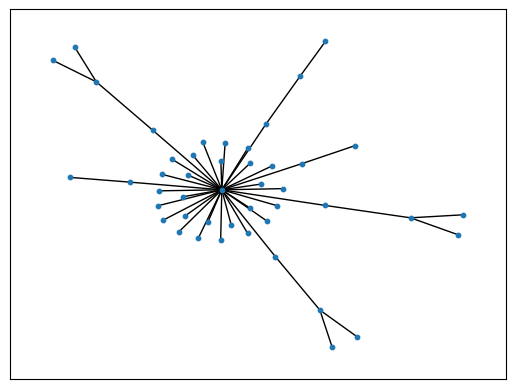

In [70]:
#Checking if graphing makes sense
nx.draw_networkx(G, pos = nx.spring_layout(G), node_size = 10, with_labels = False, font_size=10)

In [71]:
def sub_net(disc_nodes, disc_edges):
    G = nx.Graph()
    G.add_nodes_from(disc_nodes)
    G.add_edges_from(disc_edges)
    
    return G

In [72]:
#Creating networks for political and non-political subreddits

networks_pol = []

for i in range(4):
    networks_pol.append([])
    for j in range(20):
        networks_pol[i].append(sub_net(pol_nodes[i][j], pol_edges[i][j]))

networks_nonpol = []

for i in range(4):
    networks_nonpol.append([])
    for j in range(20):
        networks_nonpol[i].append(sub_net(nonpol_nodes[i][j], nonpol_edges[i][j]))

In [73]:
depth_list_netpol = []
for i, forum in enumerate(networks_pol):
    depth_list_netpol.append([])
    for m,j in enumerate(forum):
        if j:
            depth_list_netpol[i].append(list(nx.shortest_path_length(j, list(j.nodes)[0]).items())[-1][1])
        else:
            #as depth is defined by edges depth of no reply to root is 0
            depth_list_netpol[i].append(0)

depth_list_netnon = []
for i, forum in enumerate(networks_nonpol):
    depth_list_netnon.append([])
    for m,j in enumerate(forum):
        if j:
            depth_list_netnon[i].append(list(nx.shortest_path_length(j, list(j.nodes)[0]).items())[-1][1])
        else:
            #as depth is defined by edges depth of no reply to root is 0
            depth_list_netnon[i].append(0)

In [74]:
depth_list_netpol
depth_list_netnon

[[6, 10, 7, 1, 1, 2, 4, 6, 2, 1, 5, 5, 1, 0, 0, 5, 0, 3, 0, 0],
 [1, 2, 2, 0, 2, 2, 4, 2, 2, 10, 0, 1, 1, 2, 1, 0, 0, 0, 5, 0],
 [10, 2, 1, 4, 0, 1, 7, 2, 2, 4, 1, 2, 3, 0, 0, 0, 0, 2, 4, 5],
 [2, 2, 5, 4, 6, 1, 2, 6, 3, 3, 6, 1, 1, 2, 6, 0, 1, 1, 10, 0]]

In [75]:
# shortest_path_length calculates the shortest distance between nodes
bfs = list(nx.shortest_path_length(networks_pol[0][1], list(networks_pol[0][1].nodes)[0]).items())

# dictionary with all values at each depth
bfs_dict = {key: [value[0] for value in bfs if value[1] == key] for key in set(item[1] for item in bfs)}
print(bfs)
print(bfs_dict)


[('14slqu4', 0), ('jqy8v8j', 1), ('jqy87xl', 1), ('jqynnbk', 1), ('jqyohin', 1), ('jqz2t6u', 1), ('jqyyqk2', 1), ('jqy8lo9', 1), ('jqxvlu1', 1), ('jqzdrus', 1), ('jqyk4hg', 1), ('jqyx0fa', 1), ('jqz8fvt', 1), ('jqyp4ny', 1), ('jqyisxz', 1), ('jqydx2b', 1), ('jqy72z9', 1), ('jqy1pau', 1), ('jqy9ssh', 1), ('jqyt8lu', 1), ('jr0gia8', 1), ('jqy7cj0', 1), ('jqz3x8n', 1), ('jqz905x', 1), ('jqxvoxb', 1), ('jqyg3ot', 1), ('jqylt97', 1), ('jqz06ke', 2), ('jqyveq3', 2), ('jqylex3', 2), ('jqzpbe9', 2), ('jqyw83a', 2), ('jqy9cv5', 2), ('jqydamt', 2), ('jqzmpom', 2), ('jr007oh', 2), ('jqyz5b9', 2), ('jr04bqs', 2), ('jqyw6b2', 2), ('jqzz6j3', 2), ('jqyk6n5', 2), ('jqyr5fk', 2), ('jqyt7hs', 2), ('jr01kar', 3), ('jqyqwhi', 3), ('jqyqqcg', 3), ('jr02px8', 3), ('jqz20j5', 3), ('jqypyov', 3), ('jr04jjr', 3), ('jr0gy0f', 3), ('jqyf9q4', 3), ('jqz3v51', 3), ('jr0lcos', 3), ('jqysbno', 4), ('jqz2qib', 4), ('jqzy7bt', 4), ('jqzyc3v', 4), ('jqzywxo', 4), ('jqyjaef', 4), ('jqzxqsf', 4), ('jr09u2q', 4), ('jqyuv

In [76]:
max_widths_netpol = []

for i, forum in enumerate(networks_pol):
    max_widths_netpol.append([])

    for j, disc in enumerate(forum):
        if disc:
            bfs = list(nx.shortest_path_length(disc, list(disc.nodes)[0]).items())
            bfs_dict = {key: [value[0] for value in bfs if value[1] == key] for key in set(item[1] for item in bfs)}
            disc_maxw = 0
            #Check width at all depth levels (minimum rage is set to 1 since
            # 0 is only the parent node, always of length 1)
            for depth in range(1, len(bfs_dict)): 
            #Length of the list of the keys in comments_level gives the width of level
                if disc_maxw < len(bfs_dict[depth]):
                    disc_maxw = len(bfs_dict[depth])
            
            max_widths_netpol[i].append(disc_maxw)
            
        else:
            max_widths_netpol[i].append(0)

max_widths_netnon = []

for i, forum in enumerate(networks_nonpol):
    max_widths_netnon.append([])

    for j, disc in enumerate(forum):
        if disc:
            bfs = list(nx.shortest_path_length(disc, list(disc.nodes)[0]).items())
            bfs_dict = {key: [value[0] for value in bfs if value[1] == key] for key in set(item[1] for item in bfs)}
            disc_maxw = 0
            #Check width at all depth levels (minimum rage is set to 1 since
            # 0 is only the parent node, always of length 1)
            for depth in range(1, len(bfs_dict)): 
            #Length of the list of the keys in comments_level gives the width of level
                if disc_maxw < len(bfs_dict[depth]):
                    disc_maxw = len(bfs_dict[depth])
            
            max_widths_netnon[i].append(disc_maxw)
            
        else:
            max_widths_netnon[i].append(0)

In [77]:
max_widths_netpol
max_widths_netnon

[[36, 343, 82, 8, 7, 2, 11, 2, 4, 3, 20, 47, 2, 0, 0, 18, 0, 4, 0, 0],
 [1, 2, 1, 0, 1, 3, 4, 1, 1, 5, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0],
 [34, 3, 1, 12, 0, 2, 15, 11, 23, 10, 1, 14, 10, 0, 0, 0, 0, 7, 13, 26],
 [2, 2, 3, 2, 3, 1, 3, 6, 6, 6, 5, 2, 2, 4, 4, 0, 2, 1, 2, 0]]

In [78]:
def graph_sub_net(disc_nodes, disc_edges, title):
    plt.figure(figsize=(5, 5))
    
    #create axis instance
    ax = plt.gca() 
    G = nx.Graph()
    G.add_nodes_from(disc_nodes)
    G.add_edges_from(disc_edges)
    nx.draw_networkx(G, ax = ax, pos = nx.spring_layout(G), node_size = 10, with_labels = False, font_size=10)
    #Title
    ax.set_title("Network for the %s forum" %title, size=10)
    plt.show()

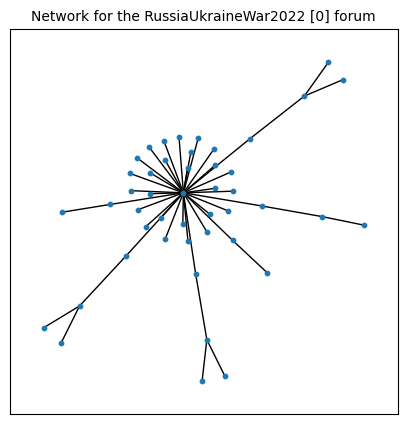

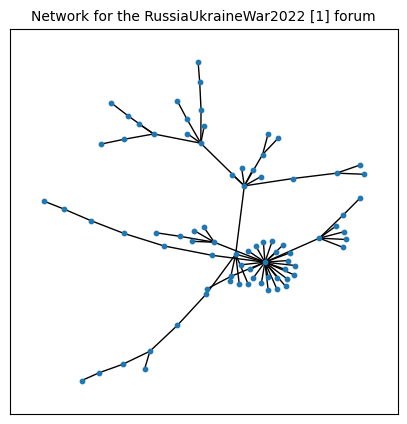

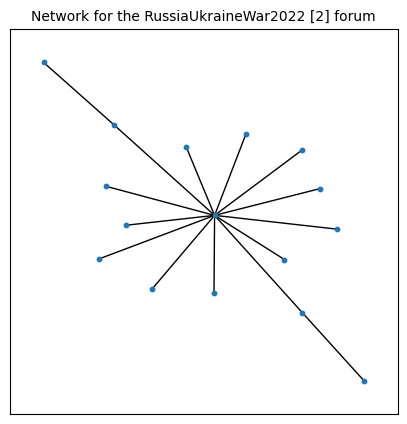

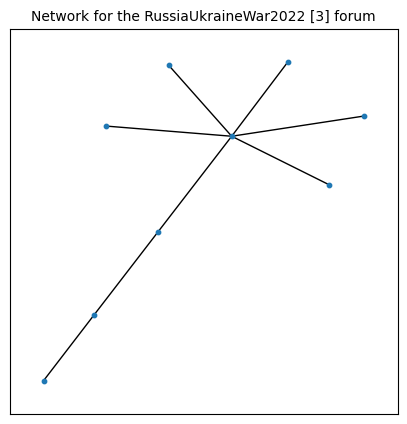

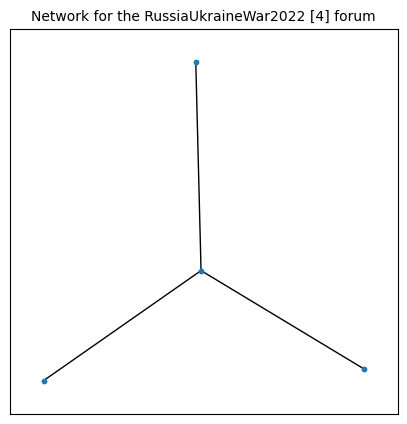

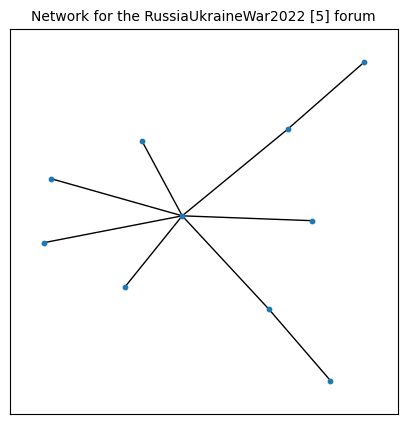

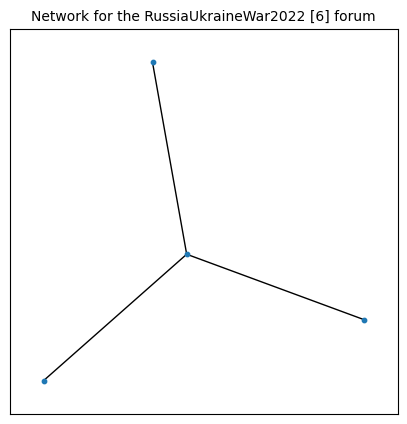

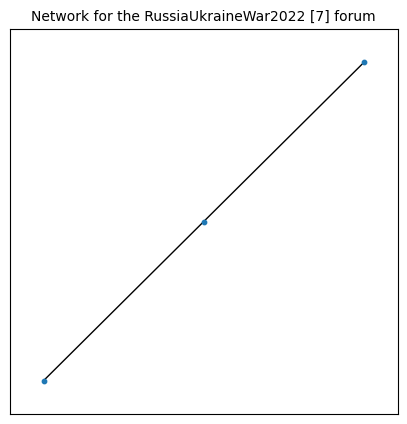

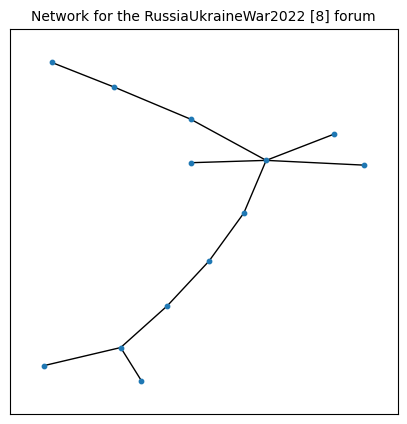

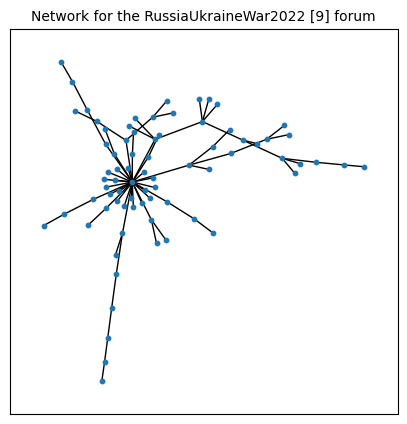

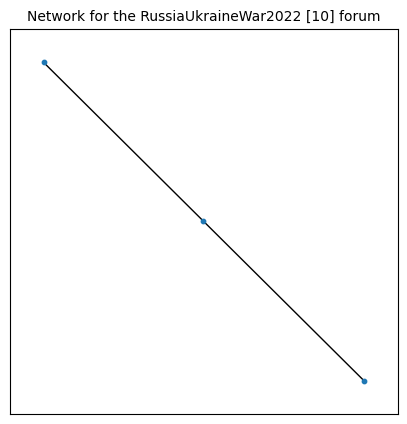

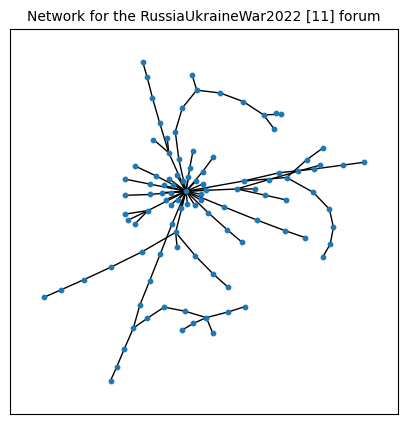

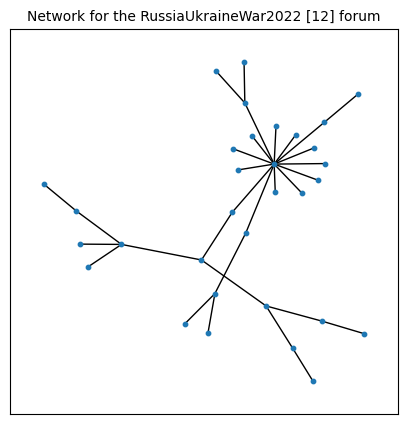

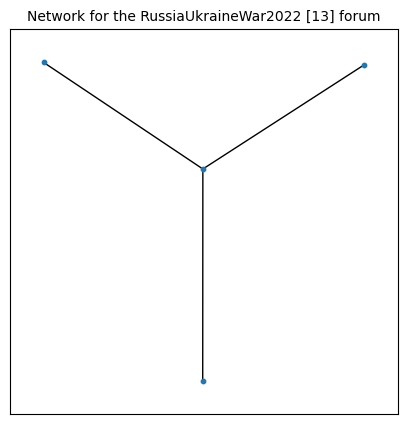

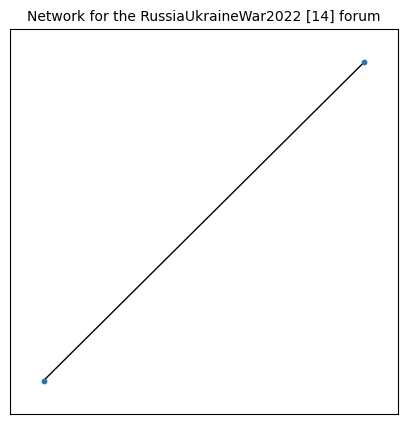

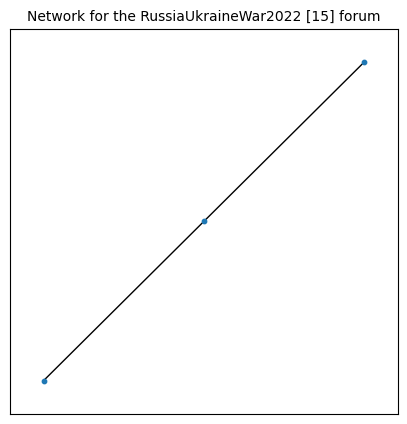

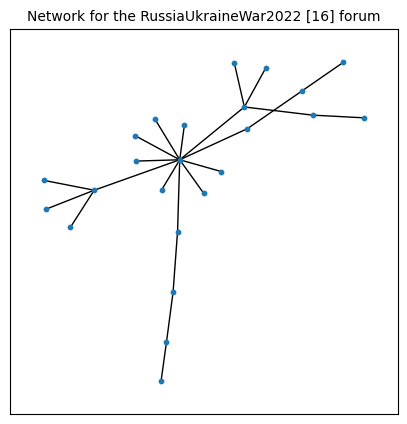

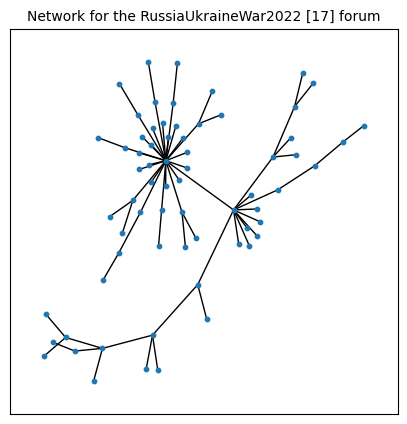

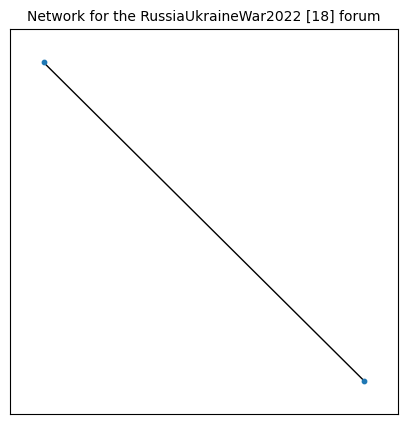

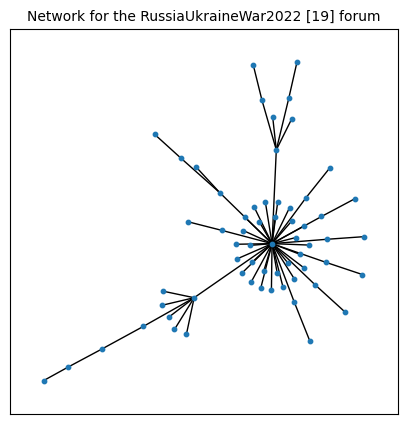

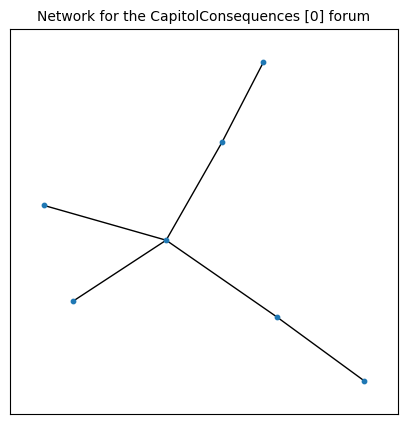

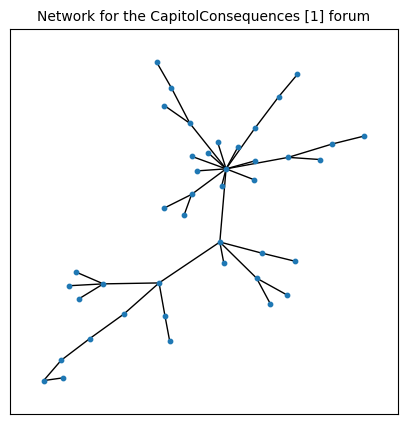

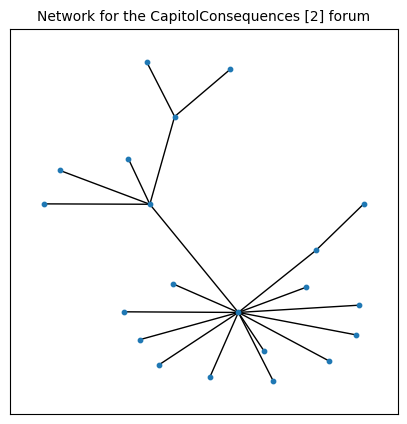

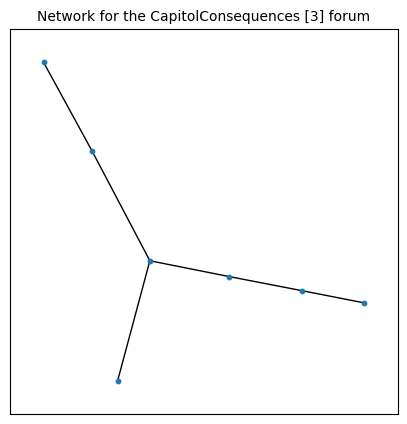

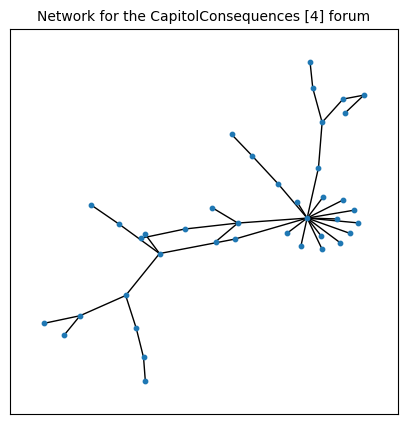

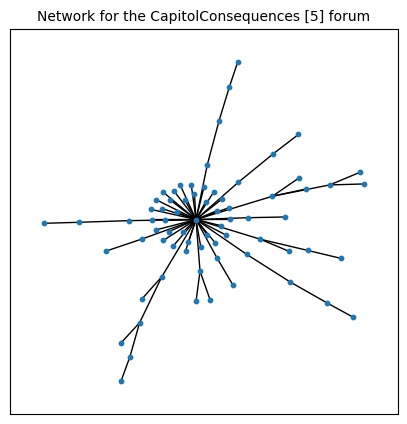

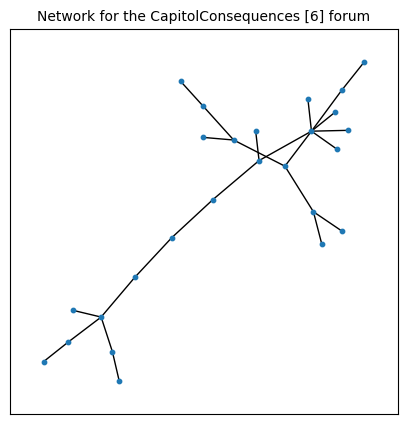

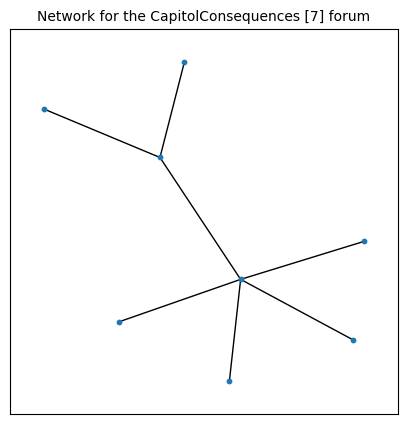

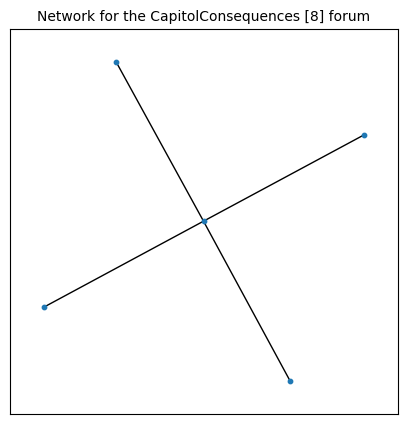

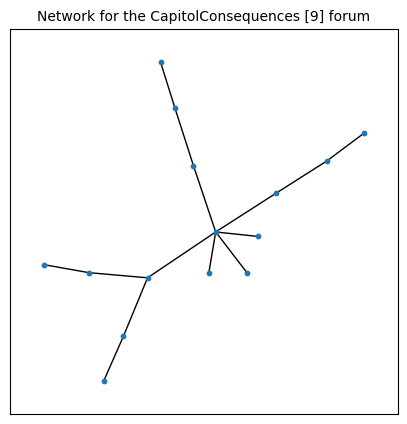

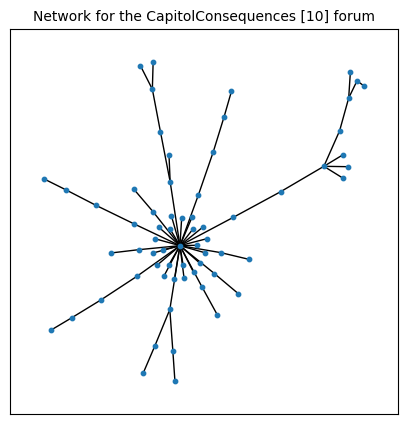

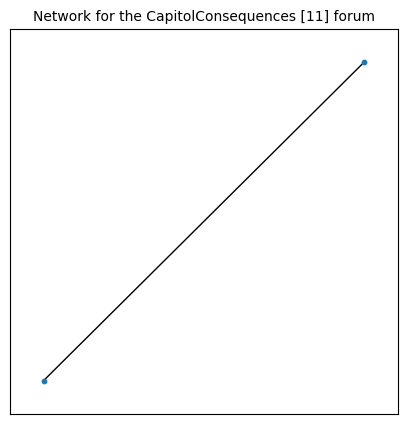

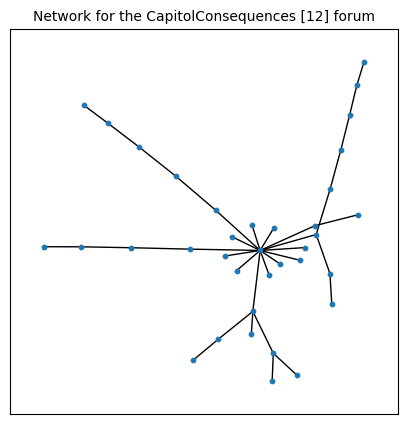

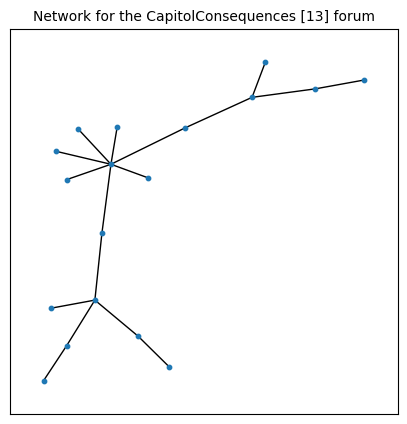

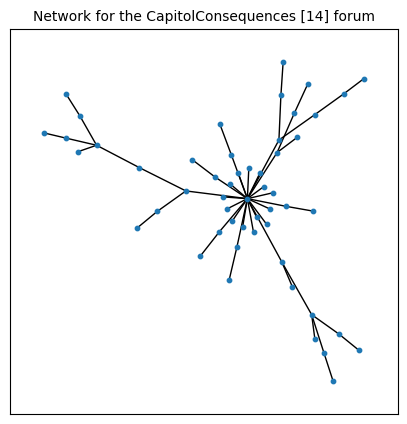

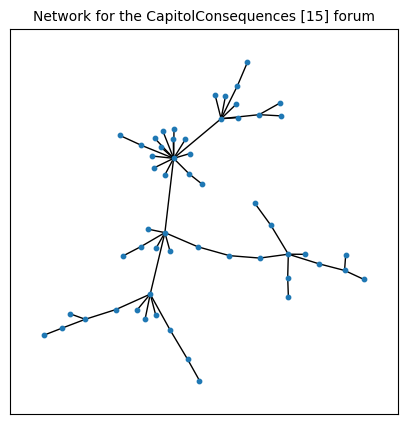

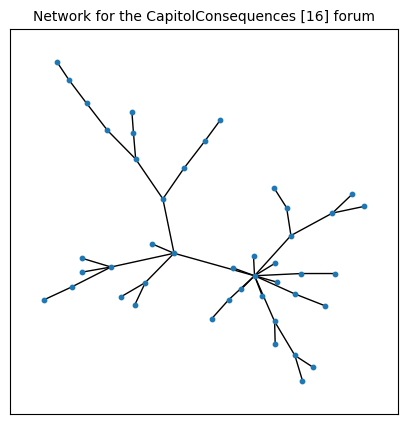

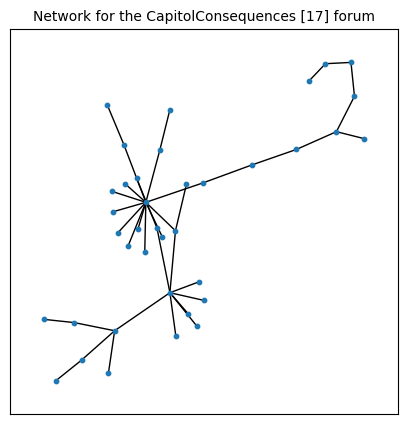

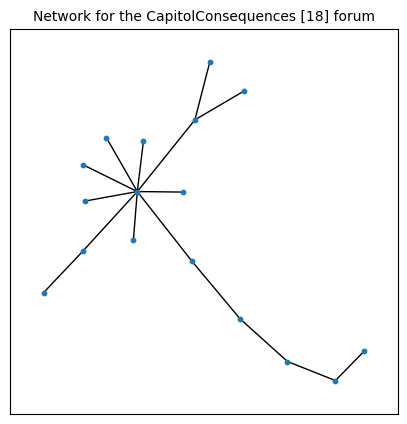

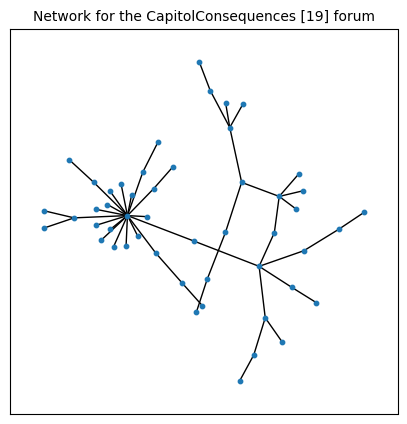

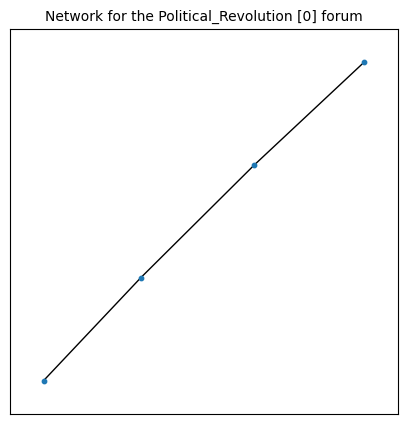

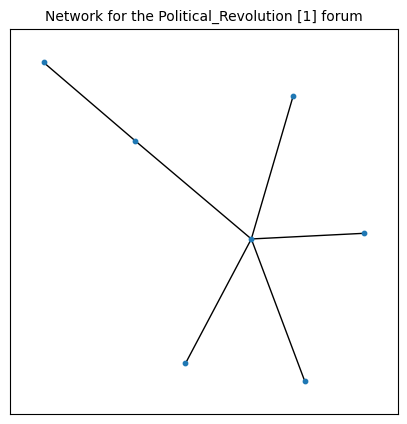

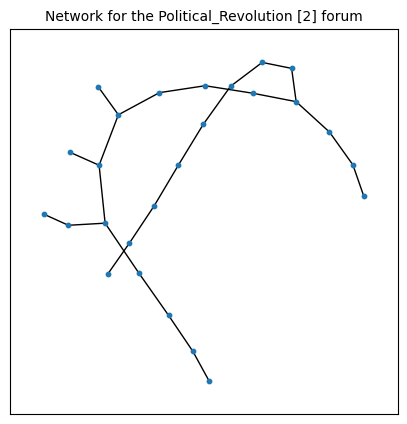

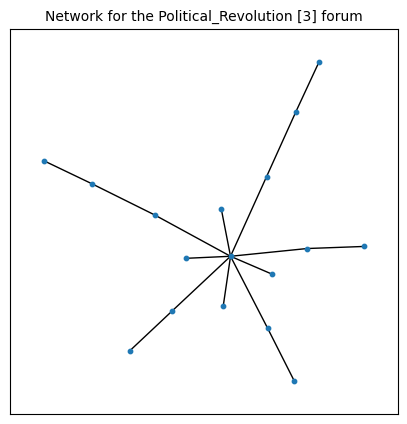

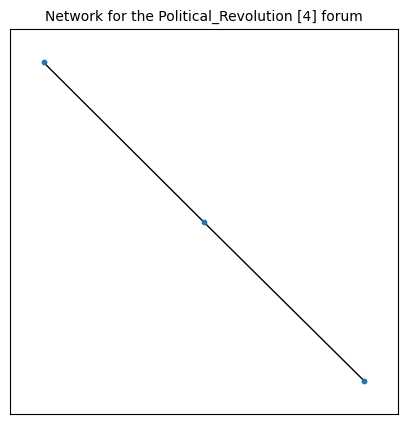

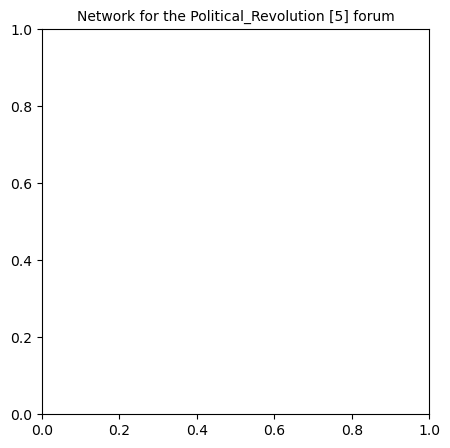

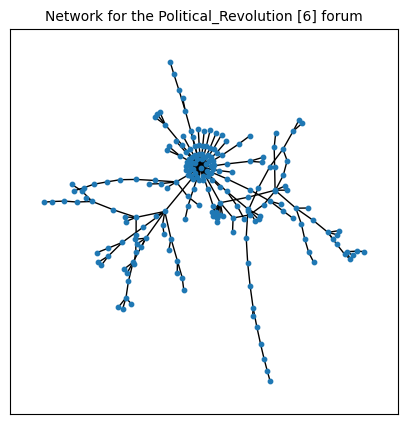

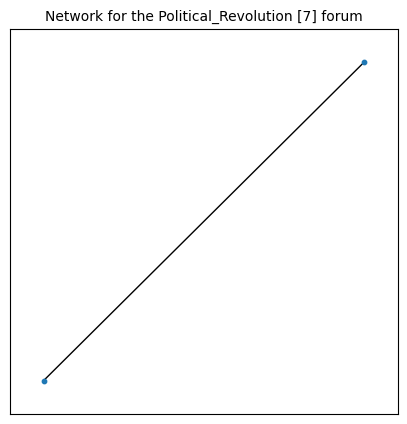

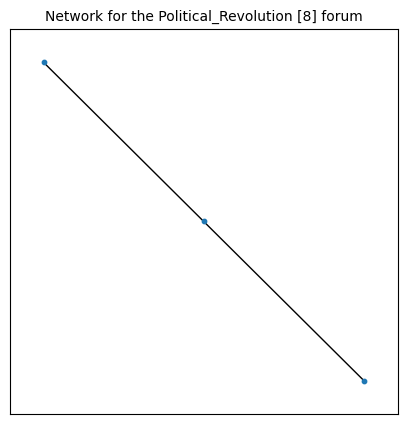

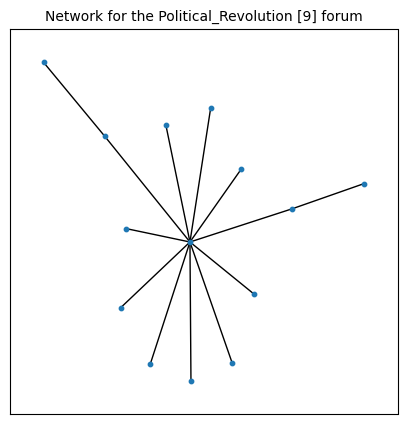

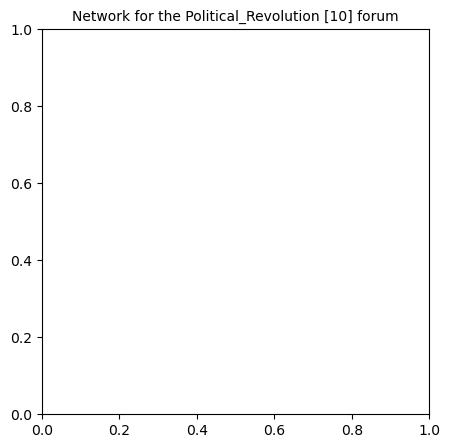

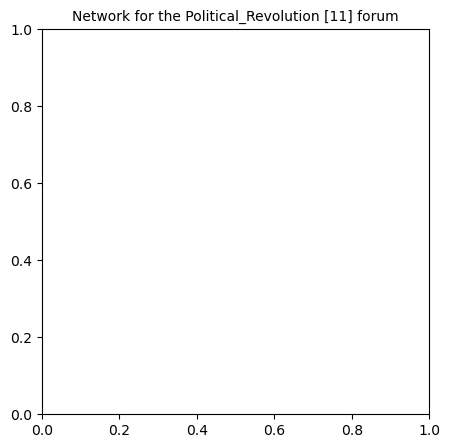

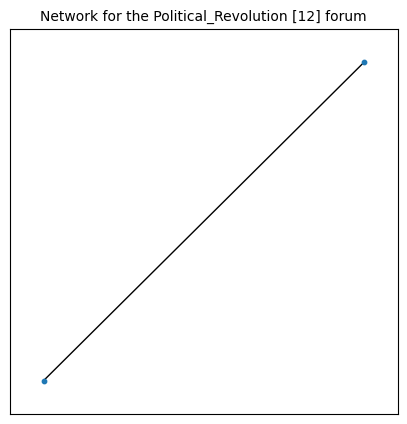

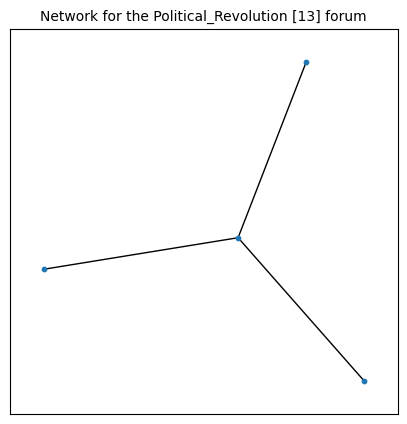

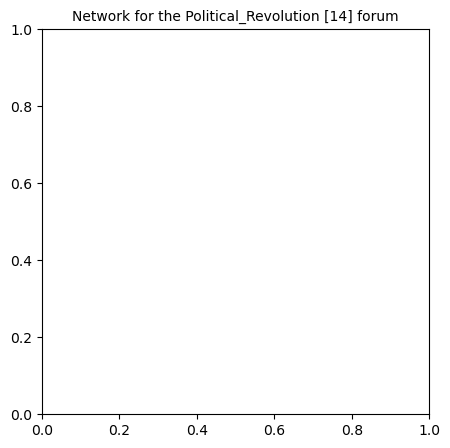

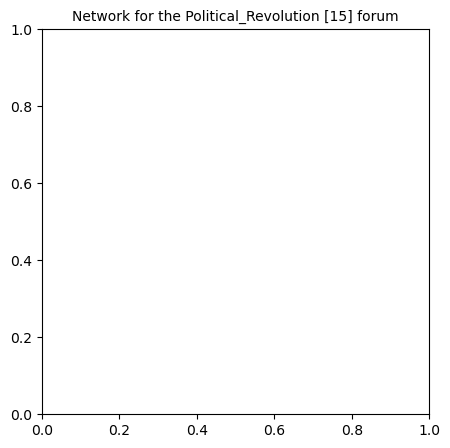

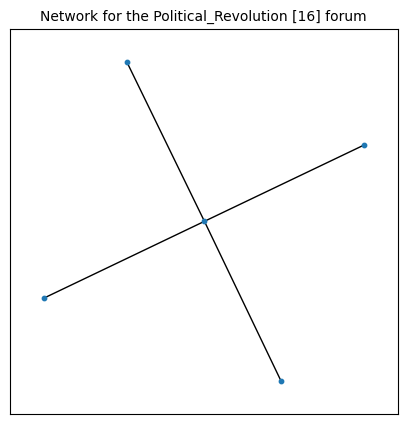

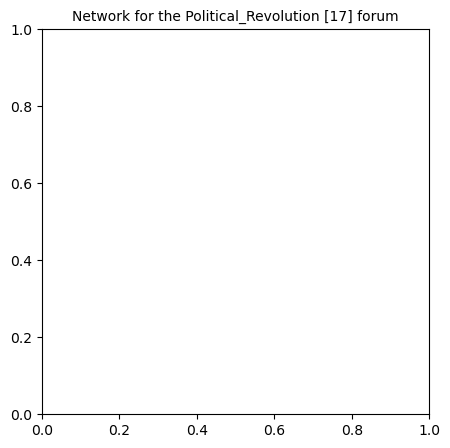

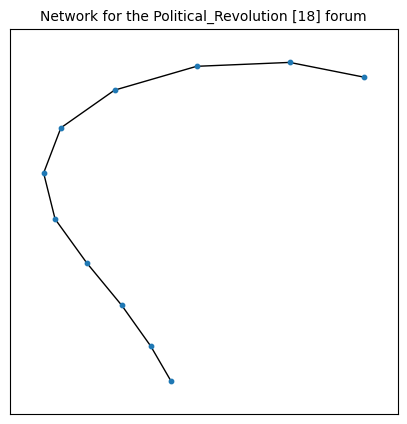

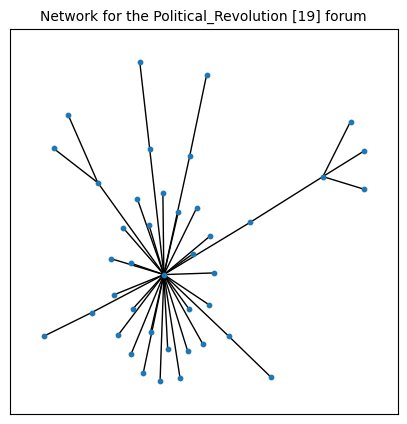

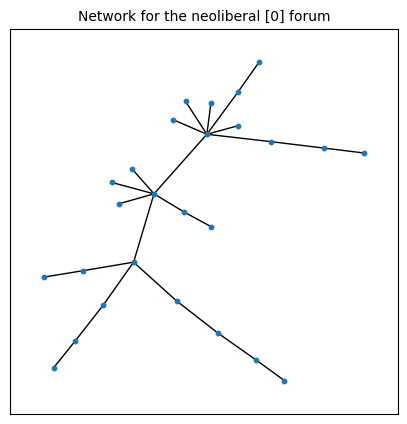

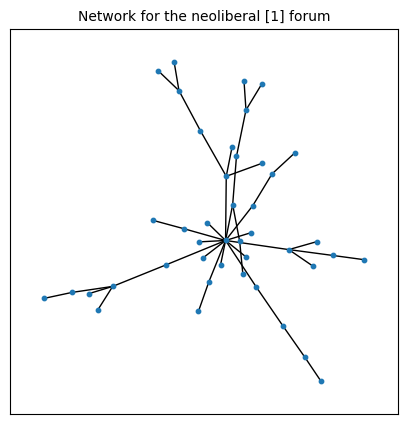

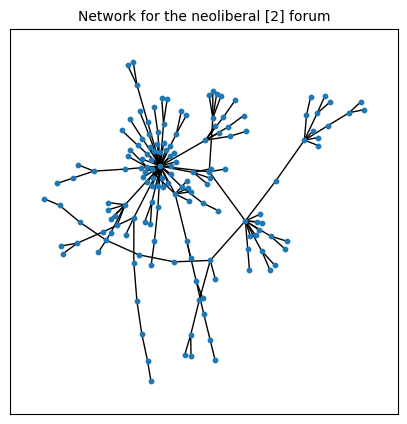

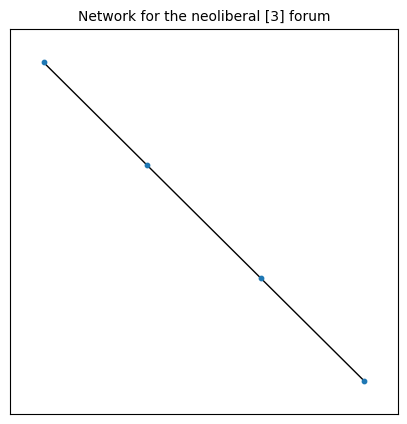

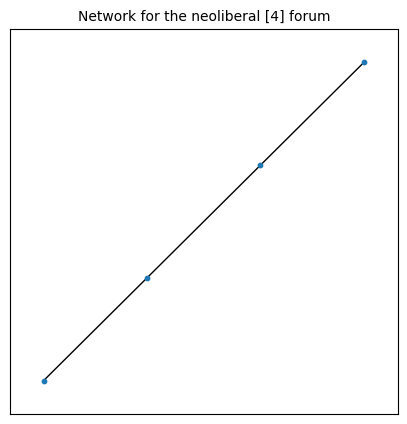

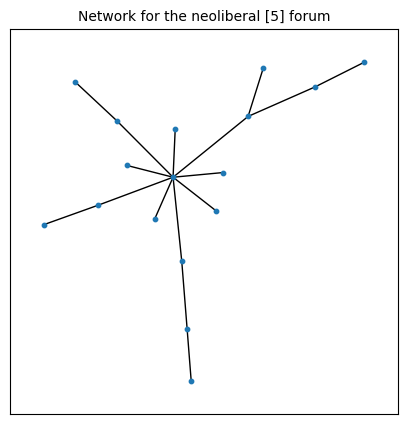

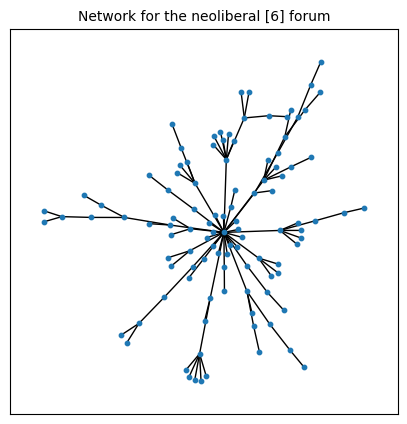

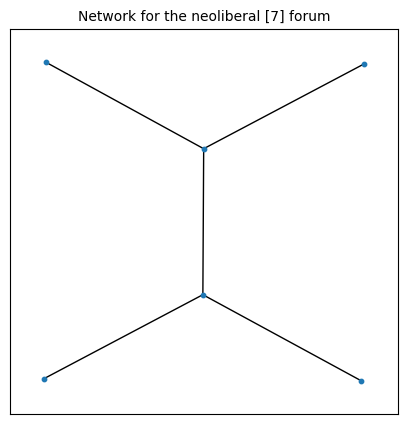

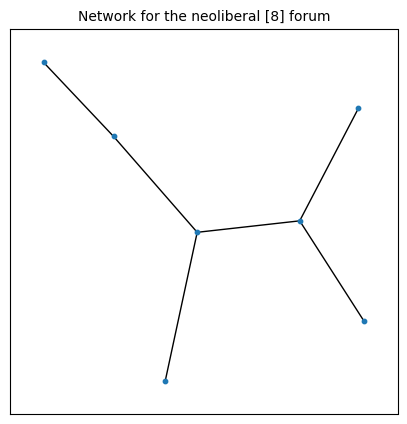

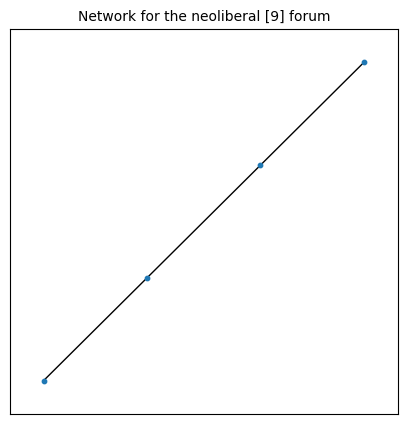

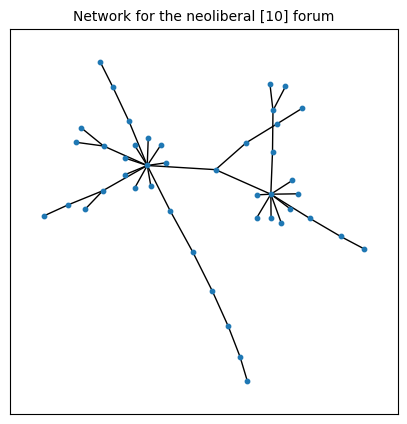

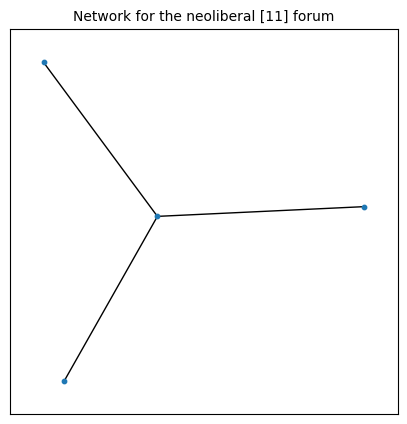

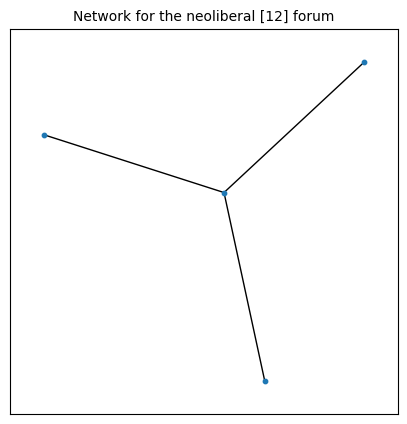

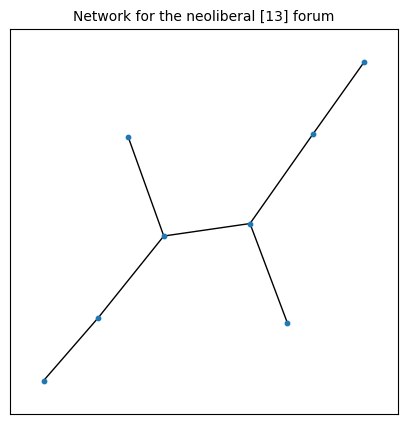

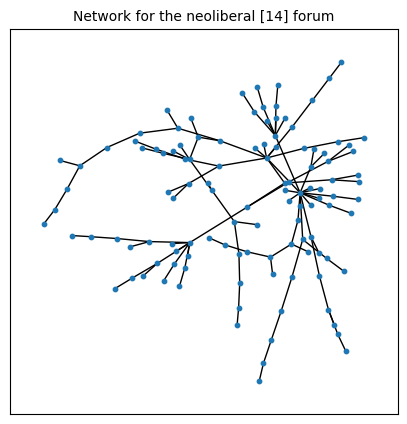

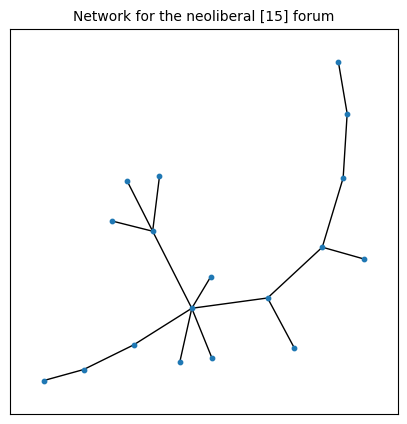

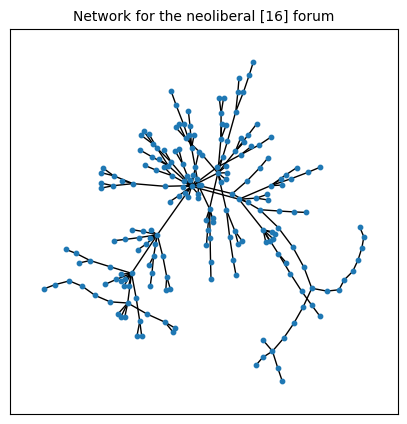

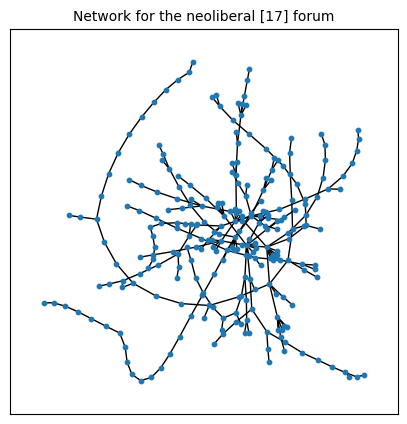

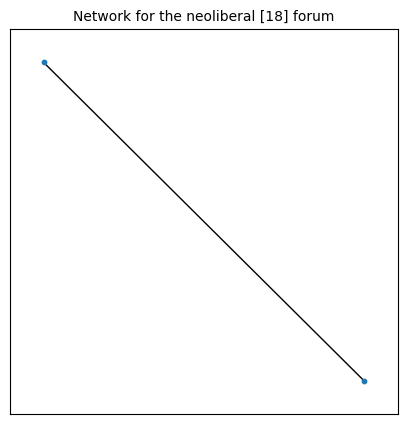

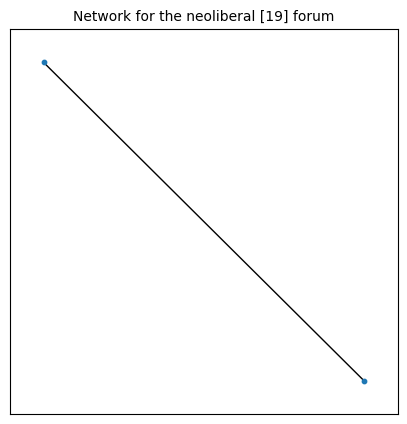

In [79]:
#Graphed them to see if there were anomalies in the construction of the networks

forum_name_pol = (['RussiaUkraineWar2022'] * 20) + (['CapitolConsequences'] * 20) + (['Political_Revolution'] * 20) + (['neoliberal'] * 20)

for i in range(4):
    for j in range(20):
        if i == 0:
            index = j
        else:
            index = j + (i*20)
        title = "{} [{}]".format(forum_name_pol[index], j)
        graph_sub_net(pol_nodes[i][j], pol_edges[i][j], title)        

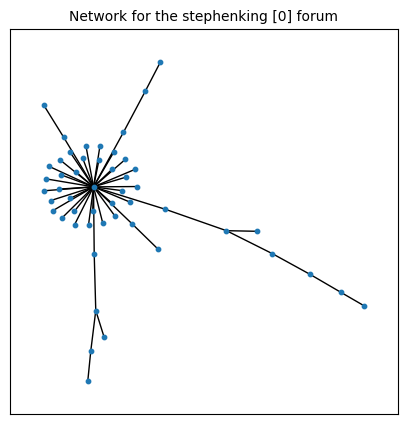

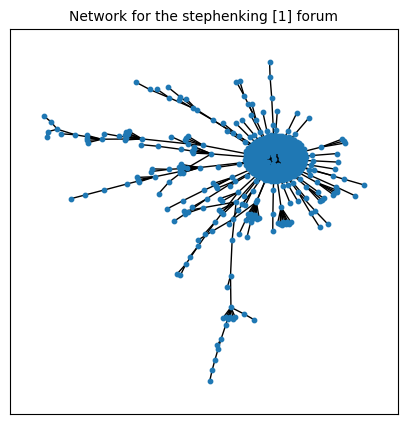

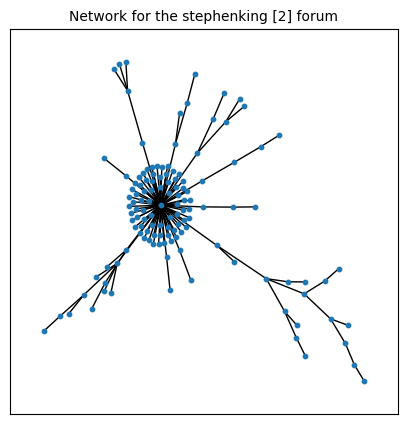

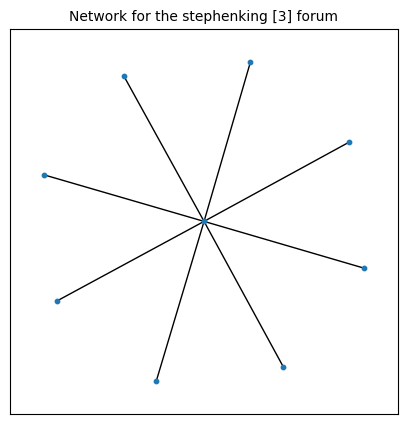

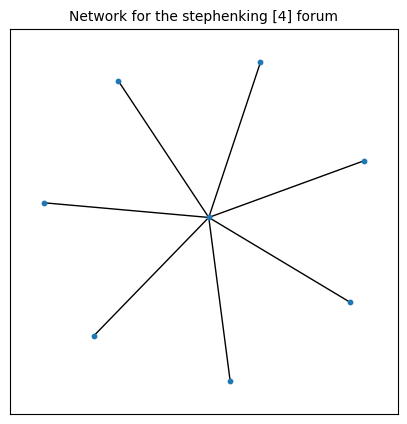

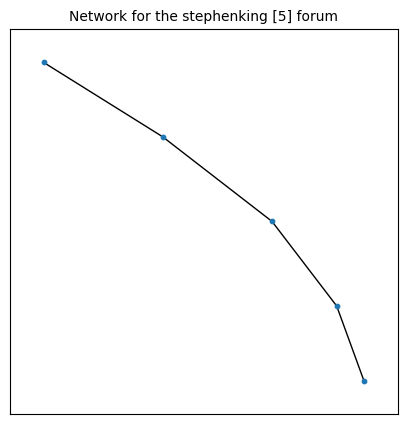

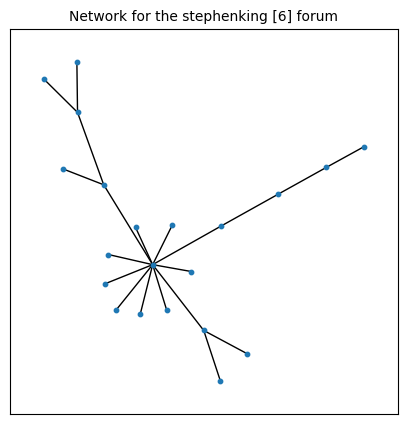

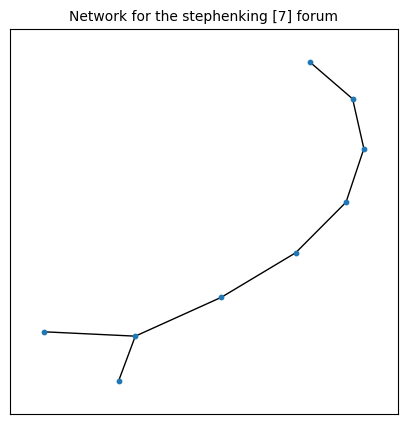

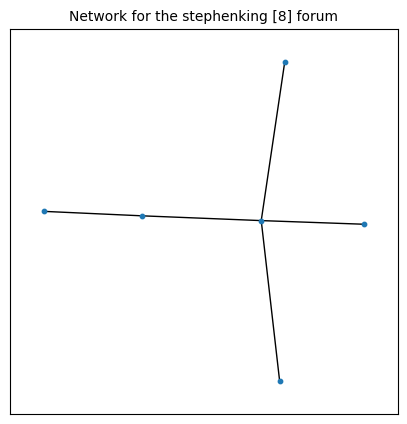

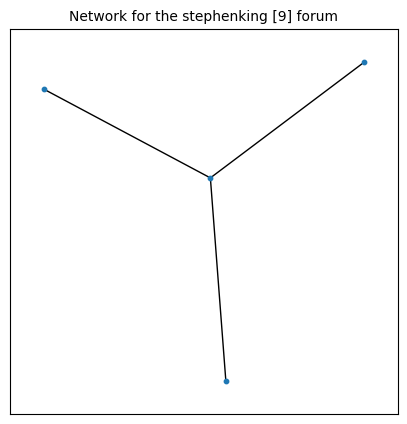

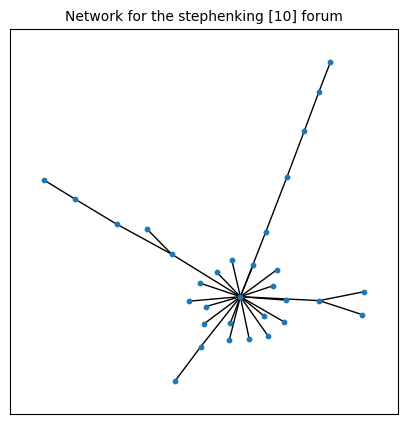

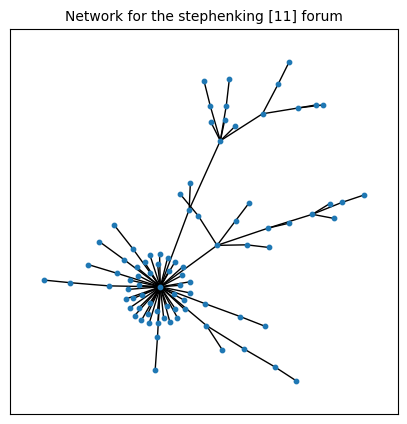

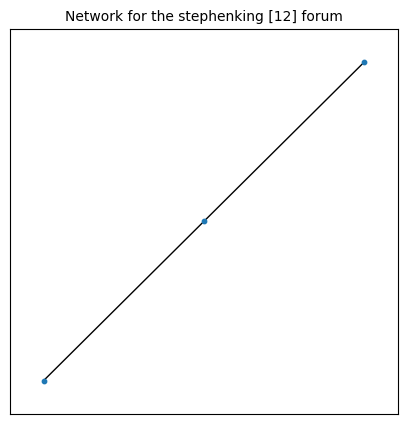

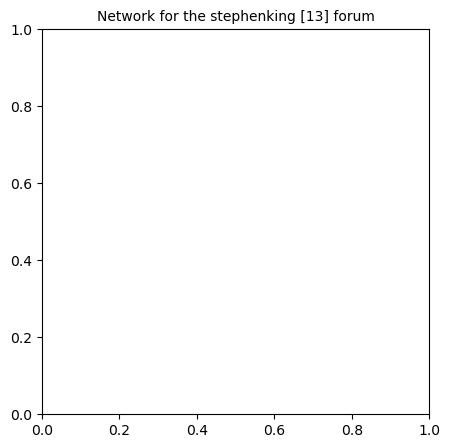

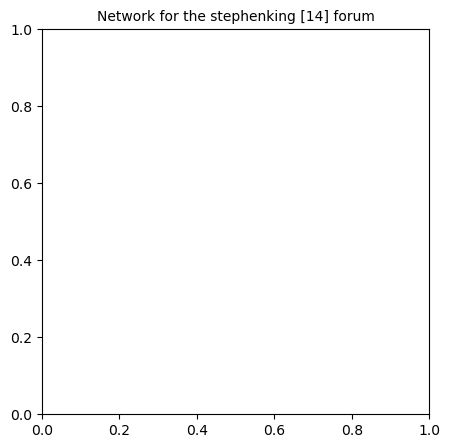

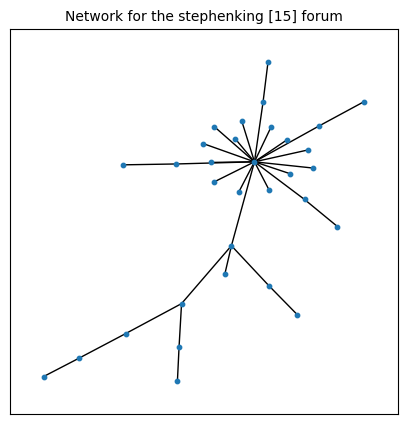

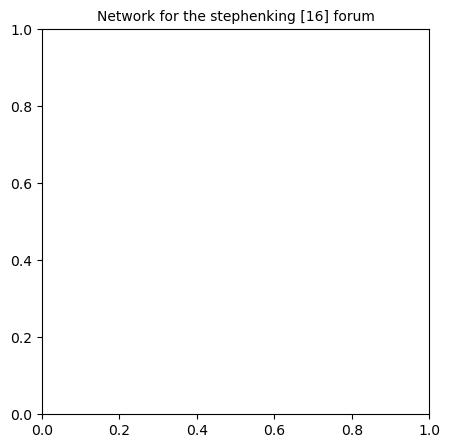

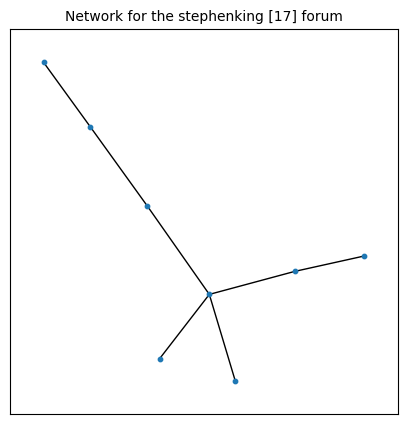

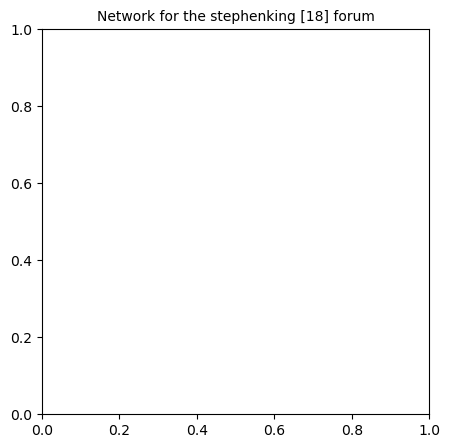

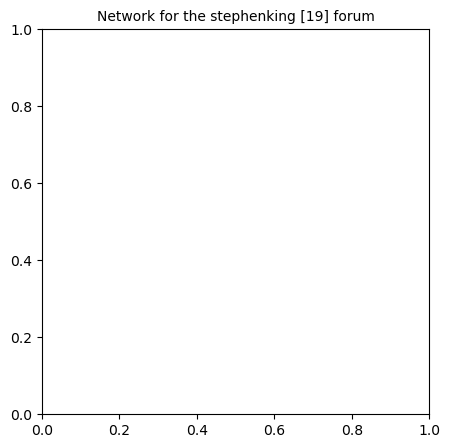

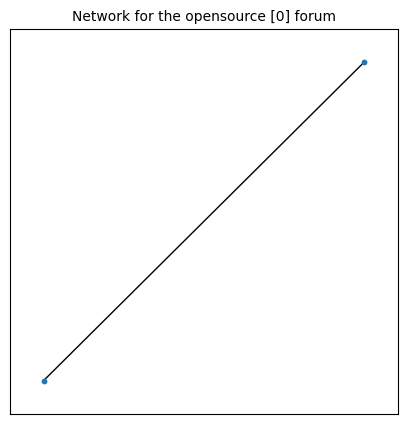

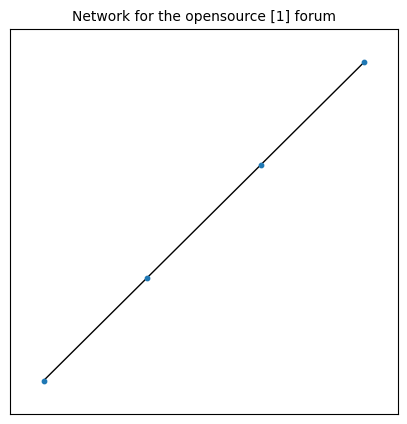

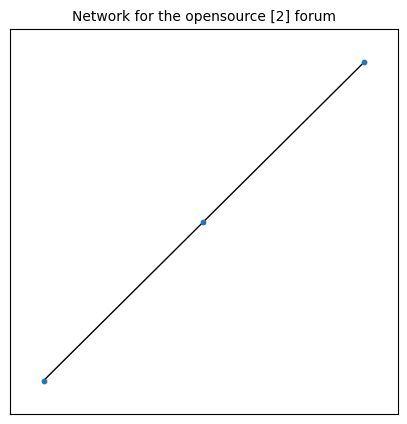

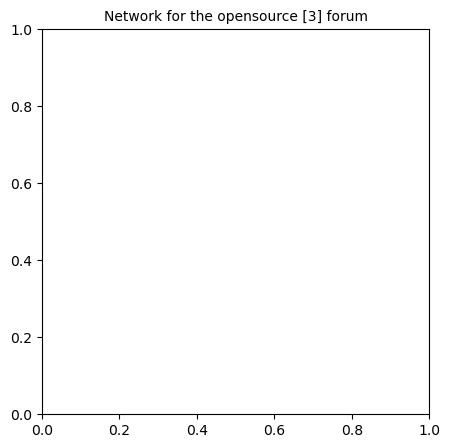

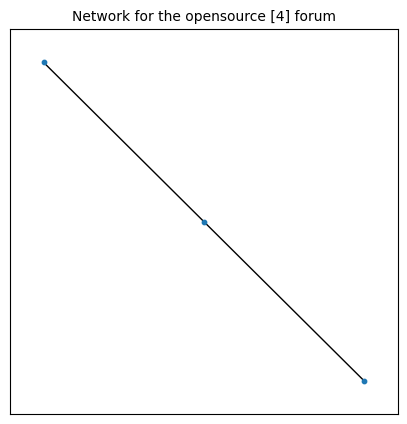

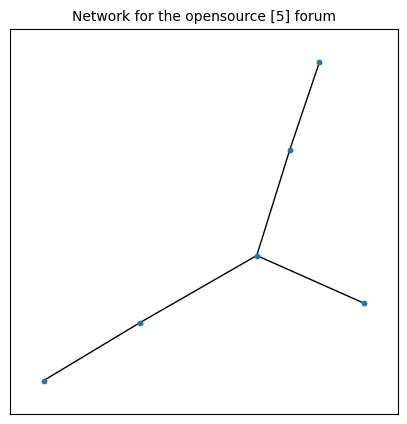

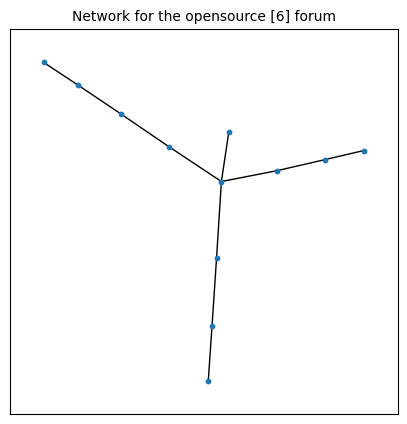

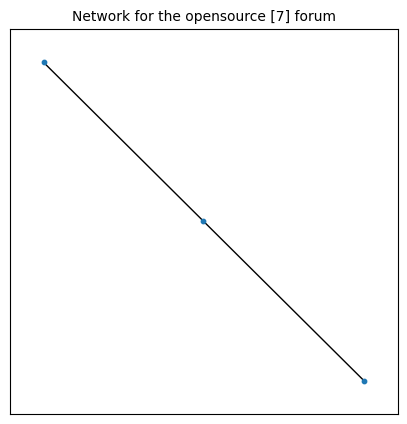

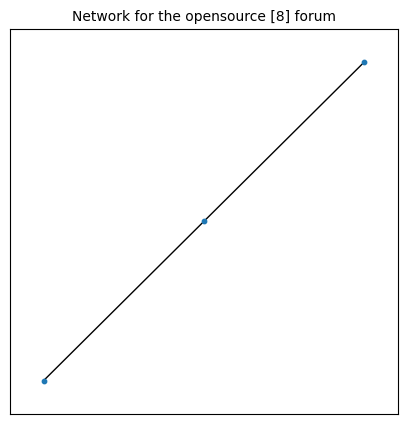

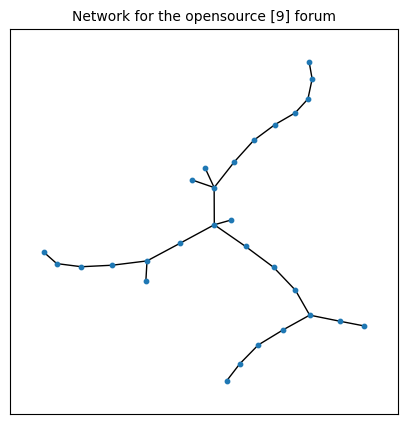

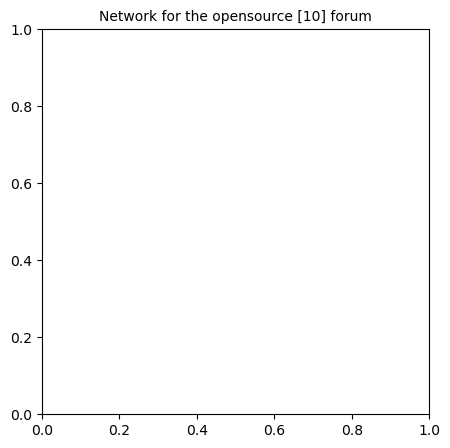

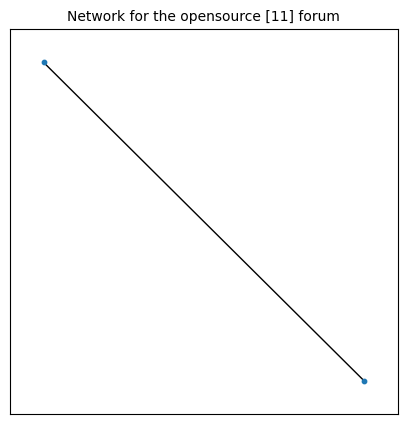

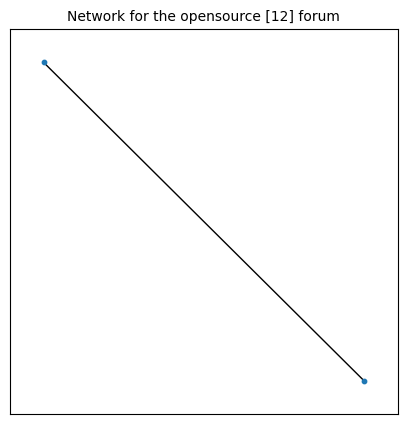

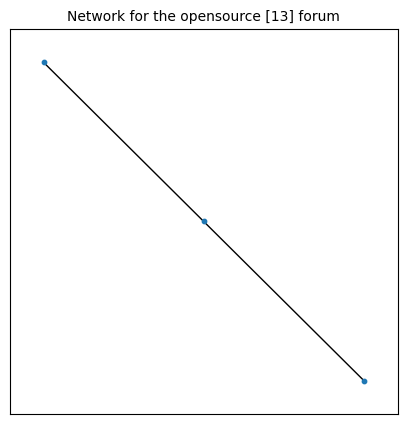

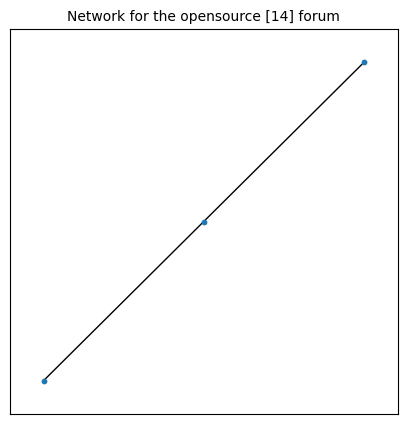

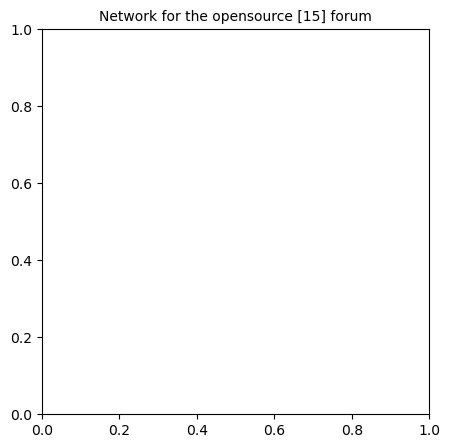

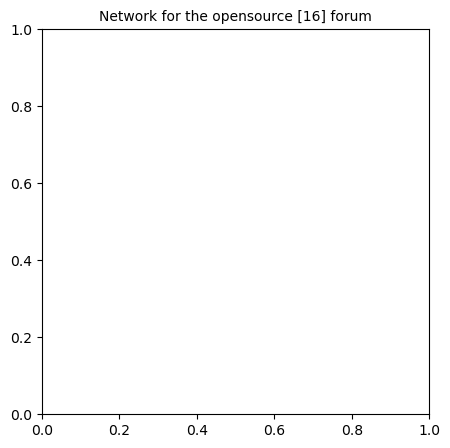

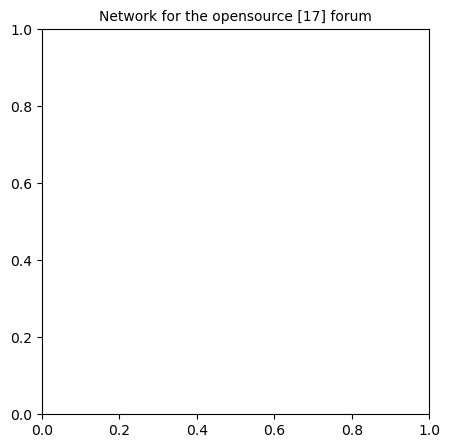

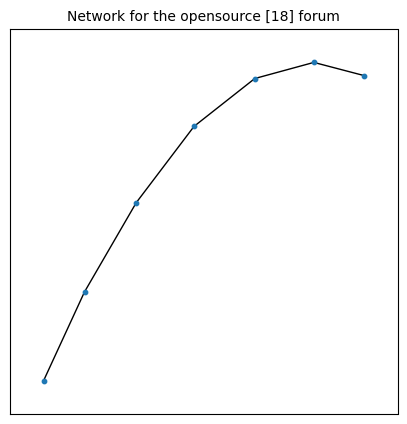

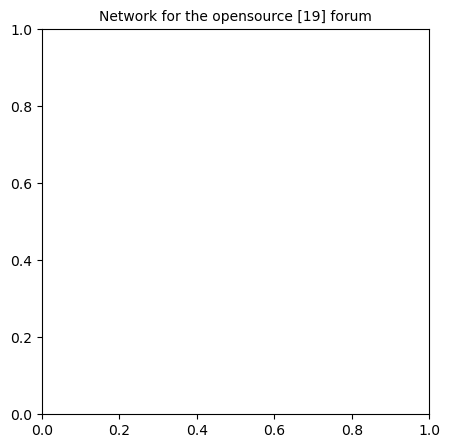

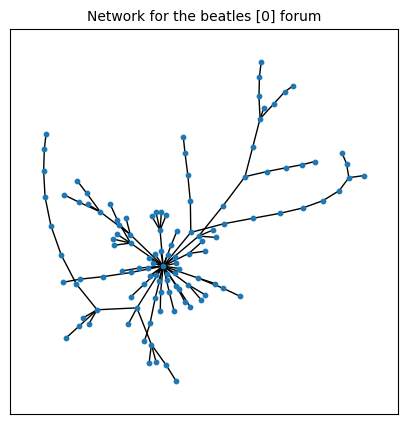

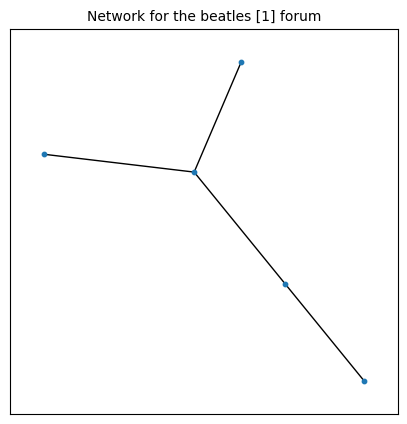

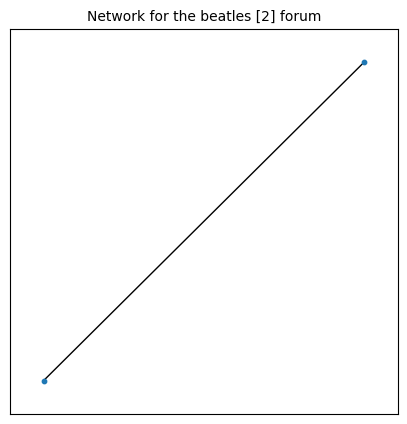

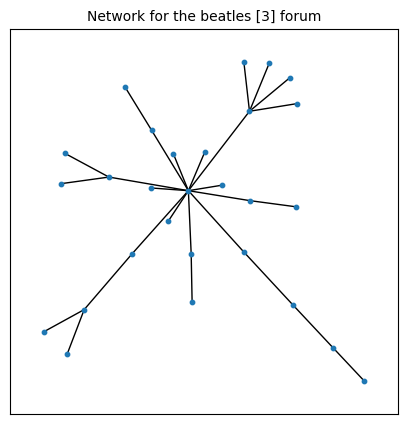

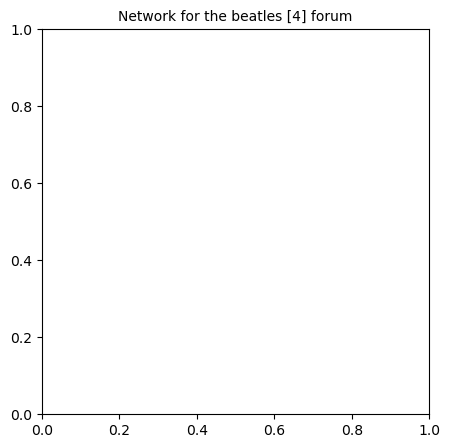

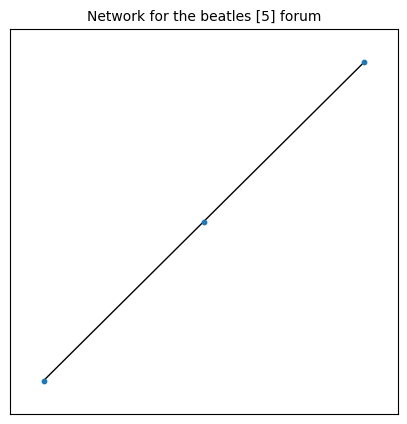

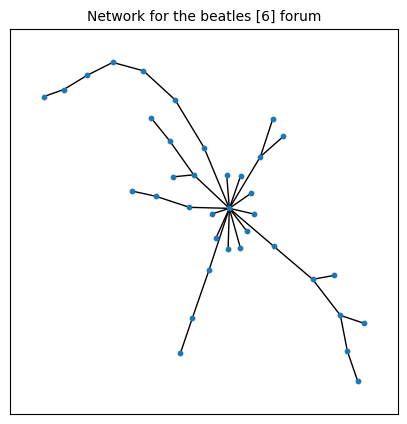

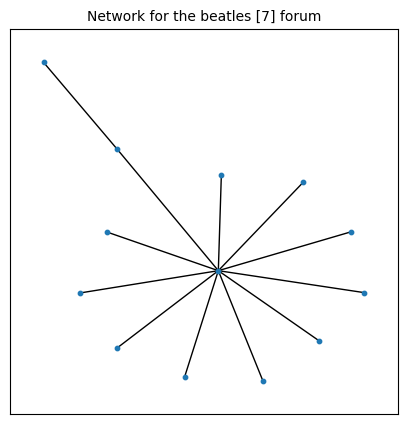

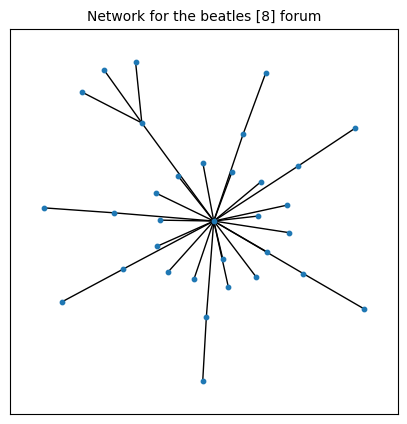

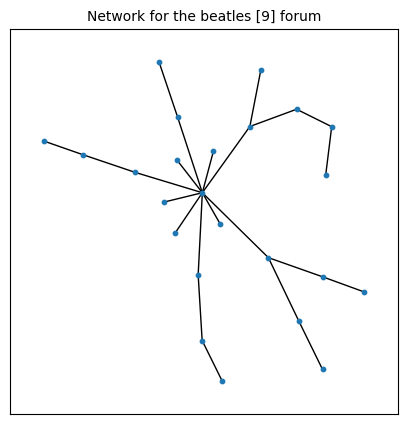

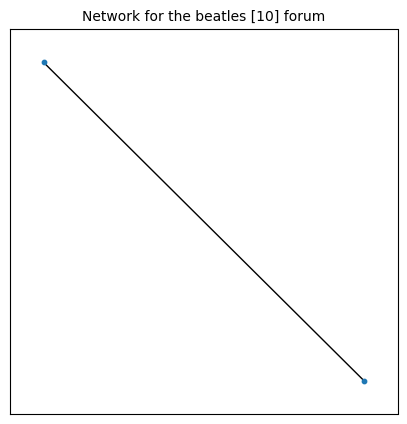

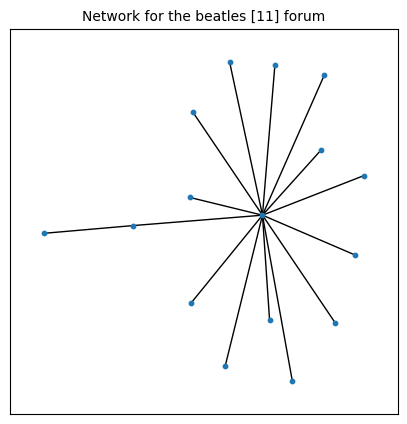

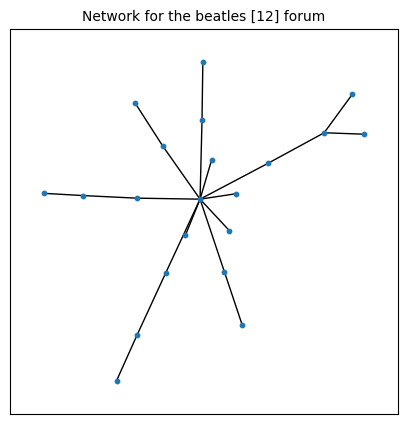

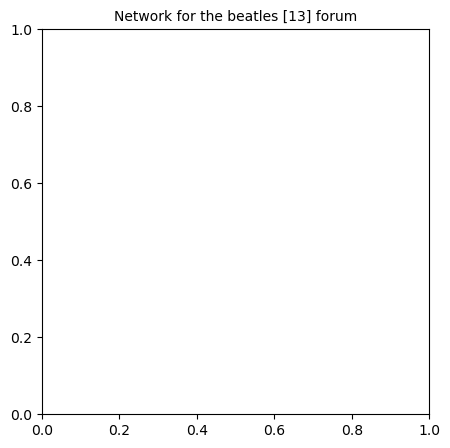

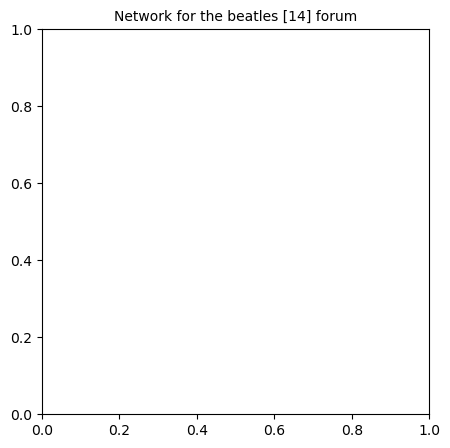

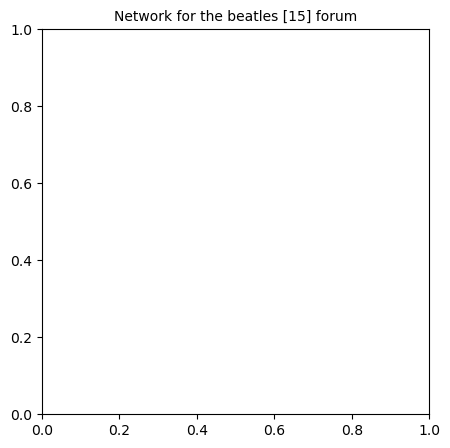

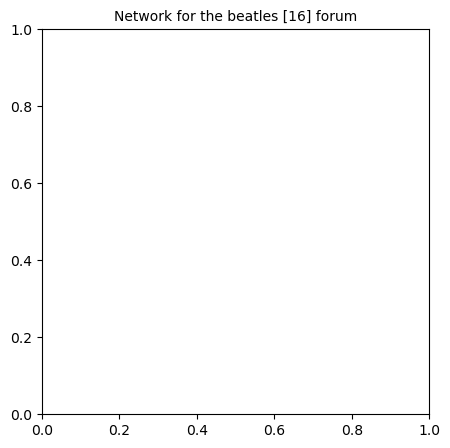

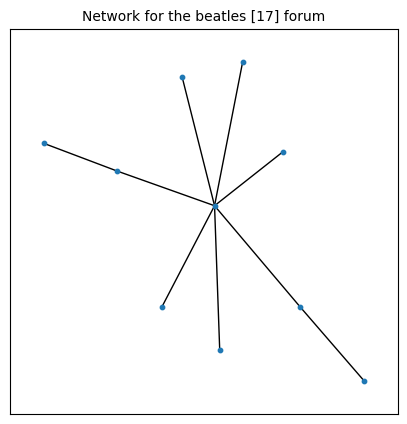

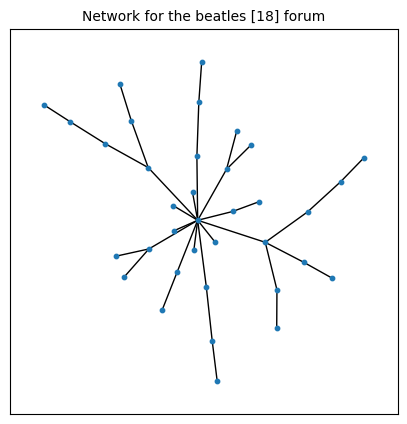

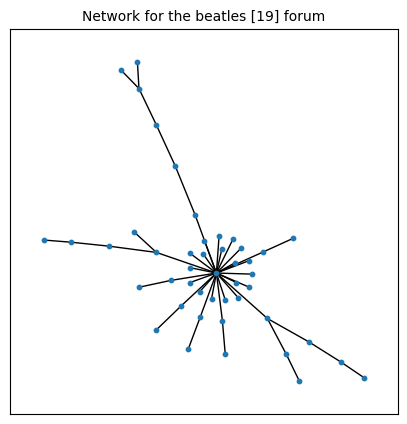

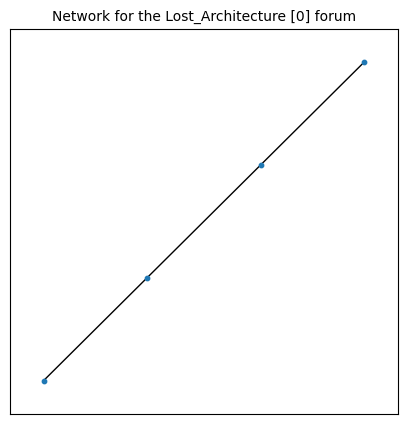

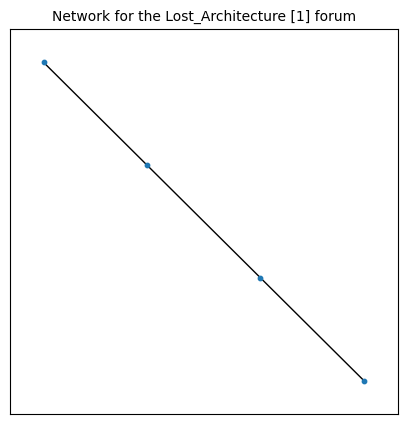

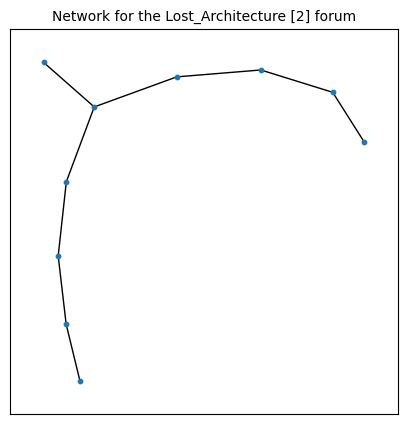

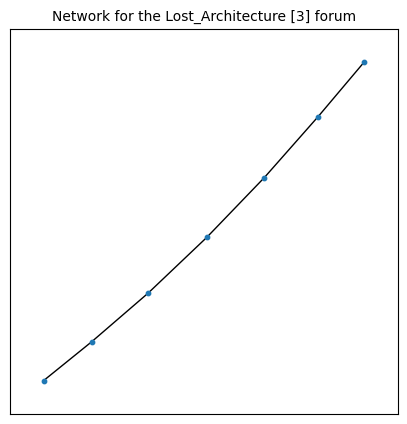

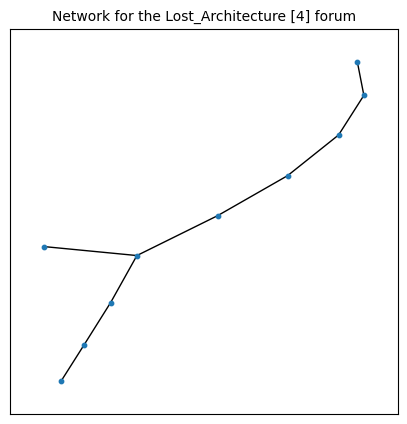

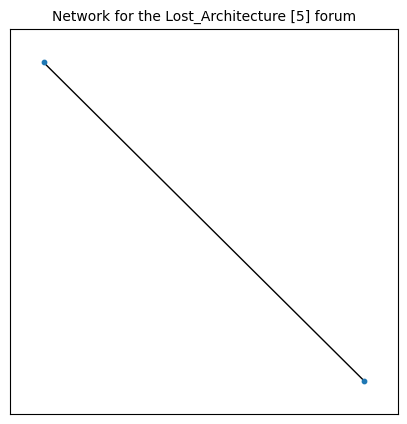

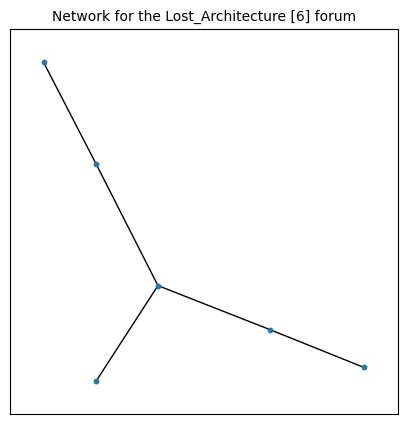

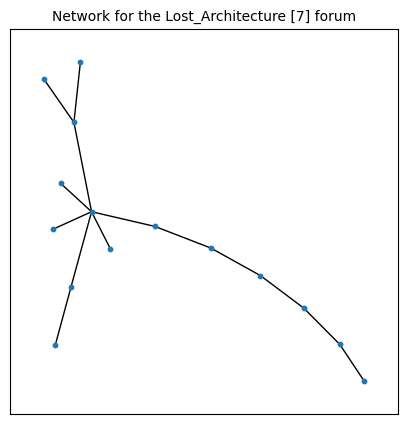

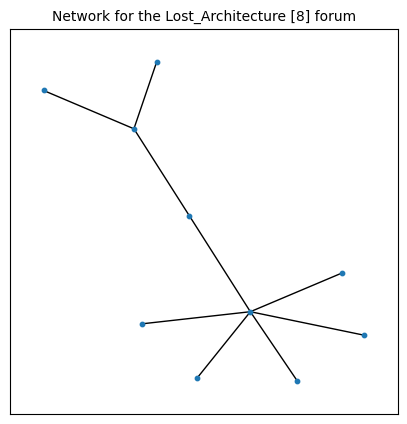

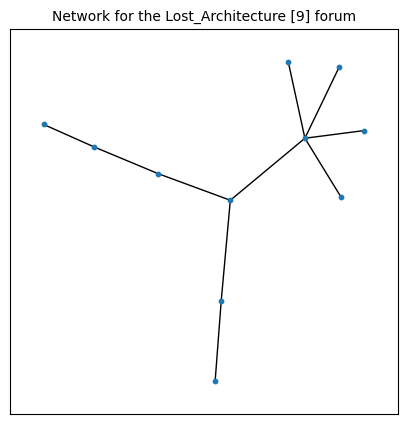

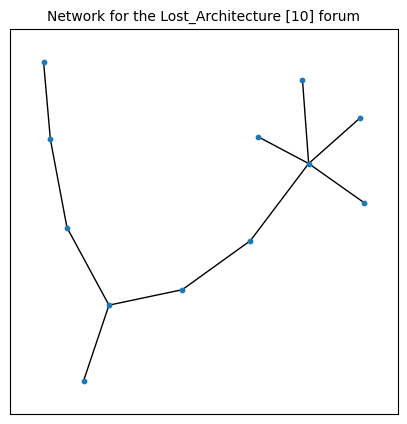

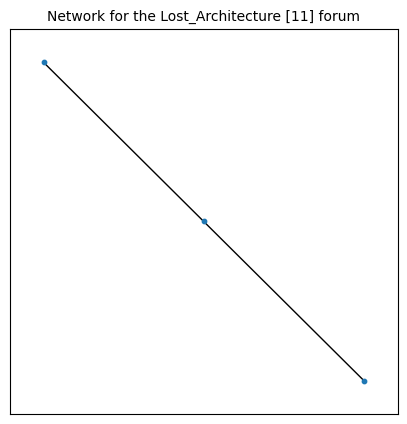

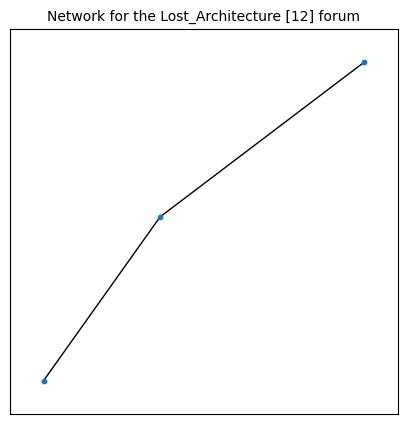

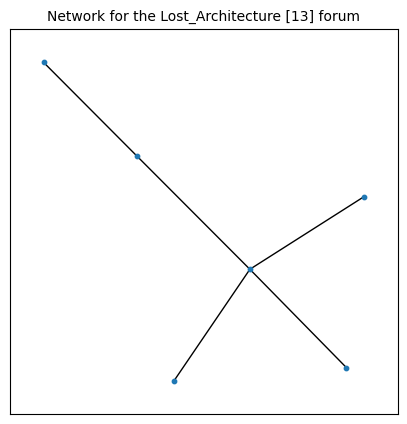

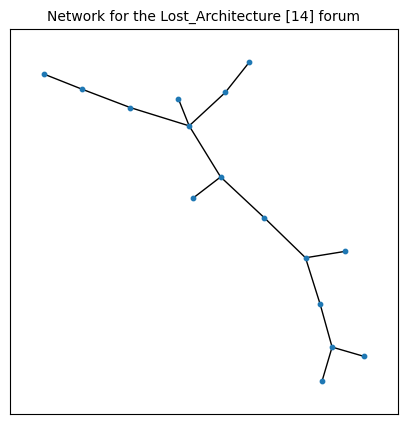

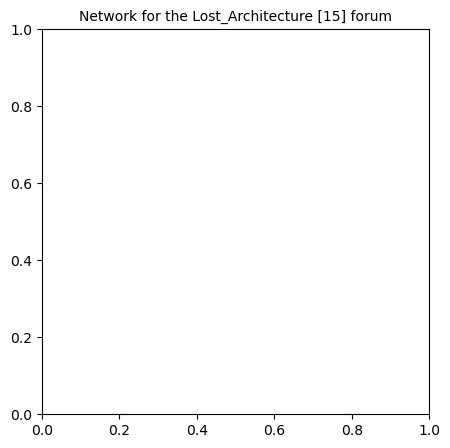

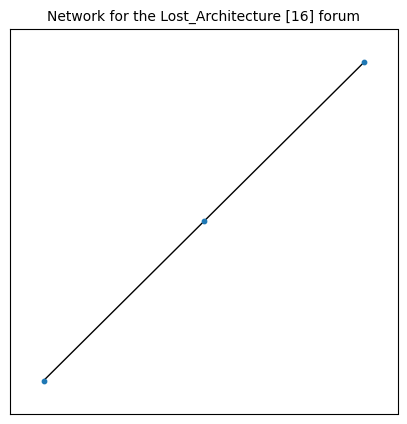

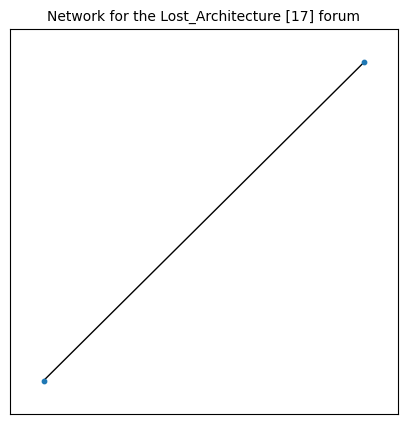

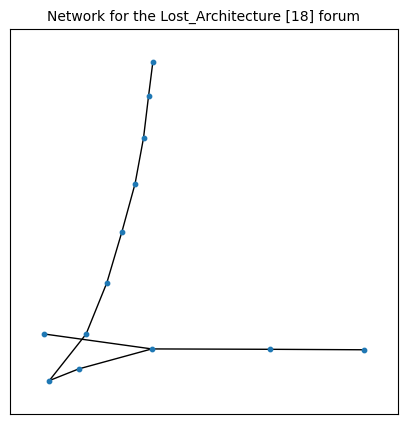

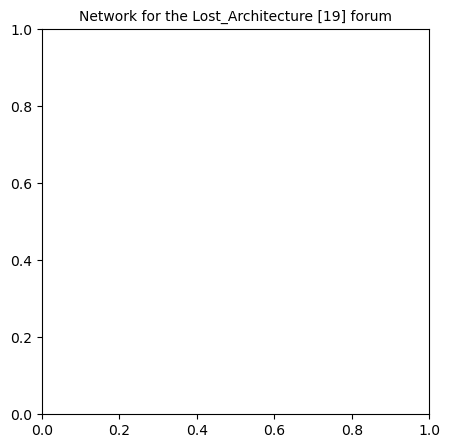

In [80]:
#Graphed them to see if there were anomalies in the construction of the networks

forum_name_non = (['stephenking'] * 20) + (['opensource'] * 20) + (['beatles'] * 20) + (['Lost_Architecture'] * 20)

for i in range(4):
    for j in range(20):
        if i == 0:
            index = j
        else:
            index = j + (i*20)
        title = "{} [{}]".format(forum_name_non[index], j)
        graph_sub_net(nonpol_nodes[i][j], nonpol_edges[i][j], title)        

### Exercise 8: Comparison and interpretation *(3 points)*
* Compare the mean number of nodes, mean maximum width, and mean maximum depth of political and non-political subreddits. What differences can you notice?

In [81]:
max_widths_netpol # has 20 max width for all 4 pol forums
max_widths_netnon # has 20 max width for all 4 non-pol forums

depth_list_netpol # has 20 max depth for all 4 pol forums
depth_list_netnon # has 20 max depth for all 4 non-pol forums

[[6, 10, 7, 1, 1, 2, 4, 6, 2, 1, 5, 5, 1, 0, 0, 5, 0, 3, 0, 0],
 [1, 2, 2, 0, 2, 2, 4, 2, 2, 10, 0, 1, 1, 2, 1, 0, 0, 0, 5, 0],
 [10, 2, 1, 4, 0, 1, 7, 2, 2, 4, 1, 2, 3, 0, 0, 0, 0, 2, 4, 5],
 [2, 2, 5, 4, 6, 1, 2, 6, 3, 3, 6, 1, 1, 2, 6, 0, 1, 1, 10, 0]]

In [82]:
def element_mean(wd_list):
    
    forum_avg = 0
    for i, forum in enumerate(wd_list):
        forum_avg += sum(forum)/len(forum)
    
    final_avg = forum_avg / (i+1)
    return final_avg


In [83]:
#Objects of relevance to calculate averages

# pol_nodes_n
# nonpol_nodes_n

# max_widths_netpol
# max_widths_netnon

# depth_list_netpol
# depth_list_netnon

In [84]:
pol_nnumber = element_mean(pol_nodes_n)
nonpol_nnumber = element_mean(nonpol_nodes_n)

pol_width = element_mean(max_widths_netpol)
nonpol_width = element_mean(max_widths_netnon)

pol_depth = element_mean(depth_list_netpol)
nonpol_depth = element_mean(depth_list_netnon)

print(f'The mean nodes number for political forums is {round(pol_nnumber,2)} and for non-political forums {round(nonpol_nnumber,2)}.')
print(f'The mean width for political forums is {round(pol_width,2)} and for non-political forums {round(nonpol_width,2)}.')
print(f'The mean depth for political forums is {round(pol_depth,2)} and for non-political forums {round(nonpol_depth,2)}.')

The mean nodes number for political forums is 32.22 and for non-political forums 19.56.
The mean width for political forums is 11.46 and for non-political forums 10.66.
The mean depth for political forums is 4.1 and for non-political forums 2.6.


All mean values were greater for the group of political forums.

* Can you conduct a statistical test to see if the differences are significant? (conduct the test if you found one which is feasible)


In [85]:
#Conduct statistical test for differences in mean width and mean depth

# I would run three t-test that has for input the nodes number, depth and width of all discussions in a subreddit.
# In this case subreddit should be set as random effect seems their discussions couldn't be thought as
# independent cause. This is because, among other similarities related to norms related to specific subforums, 
# the members of the forum are the same.

# Objects with data
pol_nodes_n
nonpol_nodes_n

max_widths_netpol
max_widths_netnon 

depth_list_netpol
depth_list_netnon

#Reminder forum order
#politics_subs = [ruwar_all, capitol_all, politrev_all, neolib_all]
#nonpol_subs = [stephking_all, opensource_all, beatles_all, architect_all]

[[6, 10, 7, 1, 1, 2, 4, 6, 2, 1, 5, 5, 1, 0, 0, 5, 0, 3, 0, 0],
 [1, 2, 2, 0, 2, 2, 4, 2, 2, 10, 0, 1, 1, 2, 1, 0, 0, 0, 5, 0],
 [10, 2, 1, 4, 0, 1, 7, 2, 2, 4, 1, 2, 3, 0, 0, 0, 0, 2, 4, 5],
 [2, 2, 5, 4, 6, 1, 2, 6, 3, 3, 6, 1, 1, 2, 6, 0, 1, 1, 10, 0]]

To wrange with data in an easier way a df with all info will be created

Dataframe<br>
'forum_type' (pol, nopol) (fixed effect); <br>
'forum_name' (ramdom effect); <br>
'discus_num' (1-20) (unit of analysis); <br>
'nodes_num' (var 1); <br>
'max_width' (var 2); <br>
'max_depth' (var 3)

In [86]:
forum_type = (['pol'] * 4 * 20) + (['nopol'] * 4 * 20)

In [87]:
forum_name = (['RussiaUkraineWar2022'] * 20) + (['CapitolConsequences'] * 20) + (['Political_Revolution'] * 20) + (['neoliberal'] * 20) \
                 + (['stephenking'] * 20) + (['opensource'] * 20) + (['beatles'] * 20) + (['Lost_Architecture'] * 20)

In [88]:
discus_num = list(range(1, 21)) * 8

In [89]:
df_nodes_num = pol_nodes_n[0] + pol_nodes_n[1] + pol_nodes_n[2] + pol_nodes_n[3] \
               + nonpol_nodes_n[0] + nonpol_nodes_n[1] + nonpol_nodes_n[2] + nonpol_nodes_n[3] 

df_max_width = max_widths_netpol[0] + max_widths_netpol[1] + max_widths_netpol[2] + max_widths_netpol[3] \
               + max_widths_netnon[0] + max_widths_netnon[1] + max_widths_netnon[2] + max_widths_netnon[3] 

df_max_depth = depth_list_netpol[0] + depth_list_netpol[1] + depth_list_netpol[2] + depth_list_netpol[3] \
               + depth_list_netnon[0] + depth_list_netnon[1] + depth_list_netnon[2] + depth_list_netnon[3] 


In [90]:
subs_info = pd.DataFrame({'forum_type': forum_type,'forum_name': forum_name, 'discus_num': discus_num, \
                          'nodes_num': df_nodes_num, 'max_width': df_max_width, 'max_depth':df_max_depth})

subs_info['forum_type'] = subs_info['forum_type'].astype('category')
subs_info['forum_name'] = subs_info['forum_name'].astype('category')
subs_info['discus_num'] = subs_info['discus_num'].astype('category')

#Used later
subs_info['log_width'] = subs_info.apply(lambda x: np.log(x['max_width']), axis=1)
subs_info['log_depth'] = subs_info.apply(lambda x: np.log(x['max_depth']), axis=1)


subs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   forum_type  160 non-null    category
 1   forum_name  160 non-null    category
 2   discus_num  160 non-null    category
 3   nodes_num   160 non-null    int64   
 4   max_width   160 non-null    int64   
 5   max_depth   160 non-null    int64   
 6   log_width   160 non-null    float64 
 7   log_depth   160 non-null    float64 
dtypes: category(3), float64(2), int64(3)
memory usage: 8.0 KB


C:\Users\agust\AppData\Local\Temp\ipykernel_20260\2383287855.py:9: RuntimeWarning: divide by zero encountered in log
  subs_info['log_width'] = subs_info.apply(lambda x: np.log(x['max_width']), axis=1)
C:\Users\agust\AppData\Local\Temp\ipykernel_20260\2383287855.py:10: RuntimeWarning: divide by zero encountered in log
  subs_info['log_depth'] = subs_info.apply(lambda x: np.log(x['max_depth']), axis=1)


In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [92]:
# Mixed model for max_depth

md = smf.mixedlm("max_depth ~ forum_type", subs_info, groups=subs_info["forum_name"])
mdf = md.fit()
print(mdf.summary())

#https://www.w3cschool.cn/doc_statsmodels/statsmodels-examples-notebooks-generated-mixed_lm_example.html

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  max_depth
No. Observations:  160      Method:              REML     
No. Groups:        8        Scale:               12.1671  
Min. group size:   20       Log-Likelihood:      -427.0649
Max. group size:   20       Converged:           Yes      
Mean group size:   20.0                                   
----------------------------------------------------------
                  Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept         2.600    0.468 5.559 0.000  1.683  3.517
forum_type[T.pol] 1.500    0.661 2.268 0.023  0.204  2.796
Group Var         0.267    0.148                          



In [93]:
# Mixed model for nodes_num

md = smf.mixedlm("nodes_num ~ forum_type", subs_info, groups = subs_info["forum_name"])
mdf = md.fit()
print(mdf.summary())

#https://www.w3cschool.cn/doc_statsmodels/statsmodels-examples-notebooks-generated-mixed_lm_example.html

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   nodes_num
No. Observations:   160       Method:               REML     
No. Groups:         8         Scale:                3014.8749
Min. group size:    20        Log-Likelihood:       -863.4110
Max. group size:    20        Converged:            Yes      
Mean group size:    20.0                                     
-------------------------------------------------------------
                   Coef.  Std.Err.   z   P>|z|  [0.025 0.975]
-------------------------------------------------------------
Intercept          19.562    8.486 2.305 0.021   2.930 36.195
forum_type[T.pol]  12.663   12.002 1.055 0.291 -10.860 36.185
Group Var         137.329    3.088                           



In [94]:
# Mixed model for max_width

md = smf.mixedlm("max_width ~ forum_type", subs_info, groups=subs_info["forum_name"])
mdf = md.fit()
print(mdf.summary())

#https://www.w3cschool.cn/doc_statsmodels/statsmodels-examples-notebooks-generated-mixed_lm_example.html

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  max_width
No. Observations:    160      Method:              REML     
No. Groups:          8        Scale:               836.5783 
Min. group size:     20       Log-Likelihood:      -762.4680
Max. group size:     20       Converged:           Yes      
Mean group size:     20.0                                   
------------------------------------------------------------
                  Coef.  Std.Err.   z   P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept         10.663    4.727 2.256 0.024   1.398 19.927
forum_type[T.pol]  0.800    6.685 0.120 0.905 -12.301 13.901
Group Var         47.537    1.819                           



The test only showed a significant effect of subreddit type for networks depth.

[None, None]

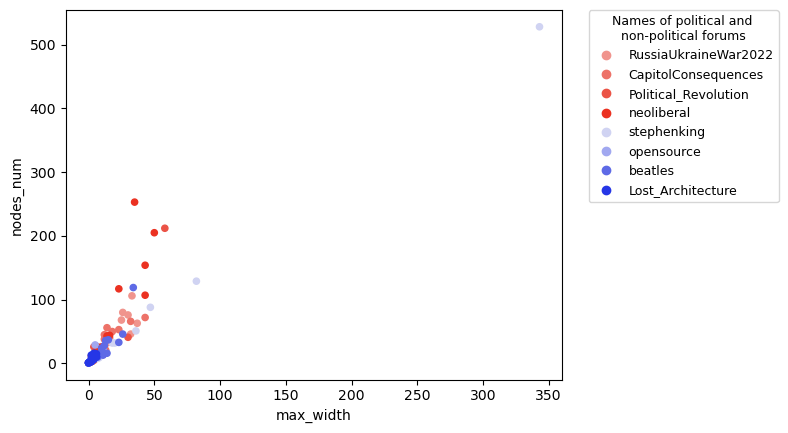

In [95]:
#Graphinf to see if there are any particularities that take to these results

colors = (['#f0948d'] * 20) + (['#ed7268'] * 20) + (['#eb5346'] * 20) + (['#eb3121'] * 20)\
         + (['#d0d3f2'] * 20) + (['#a1a8f0'] * 20) + (['#5e6ae6'] * 20) + (['#2536e6'] * 20)

subs_info.plot.scatter(x='max_width', y='nodes_num', c=colors)


#Legend
#handlelist and parties as marker and label for legend, 
#ncol for horizontal, bigger markerscale, change of proportion for better fitting
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in pd.Series(colors).unique()] #create handle list for each required color                                                                                    #required to insert in legend    
leg1 = plt.legend(handlelist, subs_info['forum_name'].unique(), bbox_to_anchor=(1.45, 0.74), loc='center right', \
                  prop={'size': 9}, markerscale = 1, ncol = 1, title = 'Names of political and \nnon-political forums', \
                  title_fontsize=9)
plt.setp(leg1.get_title(), multialignment='center')


The most remarkable data point is a particularly high width and number of nodes for a "stephenking" discussion (a non-political subreddit).

In [96]:
subs_info[subs_info['max_width'] > 300]

forum_type   forum_name discus_num  nodes_num  max_width  max_depth  \
81      nopol  stephenking          2        528        343         10   

    log_width  log_depth  
81    5.83773   2.302585

[None, None]

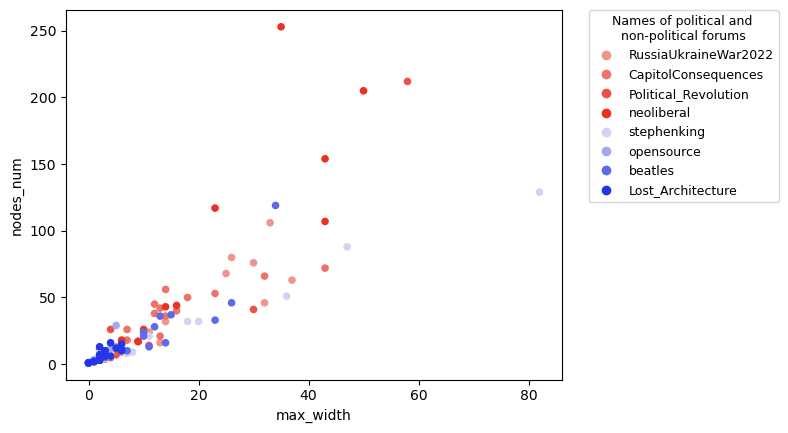

In [97]:
#See if model changes a lot with its removal
subs_info2 = subs_info[subs_info['max_width'] < 300]

colors = (['#f0948d'] * 20) + (['#ed7268'] * 20) + (['#eb5346'] * 20) + (['#eb3121'] * 20)\
         + (['#d0d3f2'] * 19) + (['#a1a8f0'] * 20) + (['#5e6ae6'] * 20) + (['#2536e6'] * 20)

subs_info2.plot.scatter(x='max_width', y='nodes_num', c=colors)


#Legend
#handlelist and parties as marker and label for legend, 
#ncol for horizontal, bigger markerscale, change of proportion for better fitting
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in pd.Series(colors).unique()] #create handle list for each required color                                                                                    #required to insert in legend    
leg1 = plt.legend(handlelist, subs_info2['forum_name'].unique(), bbox_to_anchor=(1.45, 0.74), loc='center right', \
                  prop={'size': 9}, markerscale = 1, ncol = 1, title = 'Names of political and \nnon-political forums', \
                  title_fontsize=9)
plt.setp(leg1.get_title(), multialignment='center')


In [98]:
#Removing stephenking outlier does not make width test significant
md = smf.mixedlm("max_width ~ forum_type", subs_info2, groups=subs_info2["forum_name"])
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  max_width
No. Observations:   159      Method:              REML     
No. Groups:         8        Scale:               156.7954 
Min. group size:    19       Log-Likelihood:      -626.7345
Max. group size:    20       Converged:           Yes      
Mean group size:    19.9                                   
-----------------------------------------------------------
                  Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept          6.504    2.232 2.913 0.004  2.129 10.879
forum_type[T.pol]  4.958    3.153 1.573 0.116 -1.221 11.138
Group Var         11.991    0.939                          



In [99]:
#Removing stephenking outlier makes number of nodes test significant 
md = smf.mixedlm("nodes_num ~ forum_type", subs_info2, groups=subs_info2["forum_name"])
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  nodes_num
No. Observations:   159      Method:              REML     
No. Groups:         8        Scale:               1421.2713
Min. group size:    19       Log-Likelihood:      -798.9718
Max. group size:    20       Converged:           Yes      
Mean group size:    19.9                                   
-----------------------------------------------------------
                  Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         13.177    5.879 2.241 0.025  1.654 24.699
forum_type[T.pol] 19.048    8.300 2.295 0.022  2.780 35.317
Group Var         66.264    2.149                          



* Compare the distribution of the maximum width and maximum height of political vs non political subreddits by plotting their relative frequencies.
* Create a scatterplot with the log of max width of the tree on the x-axis, and the max depth of the tree on the y-axis. Color the dots based on their group (political vs. non-political). Add a large dot for both groups to show the mean of the group. 

(0.0, 62.0)

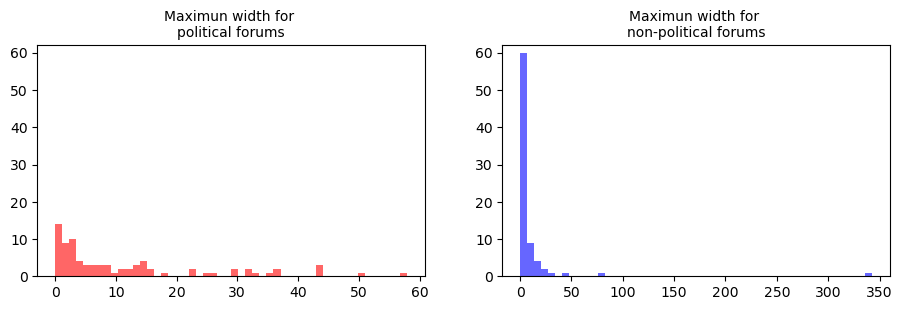

In [100]:
pol_df = subs_info[:81]
nopol_df = subs_info[81:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

ax1.hist(list(pol_df['max_width']), log=False, bins= 50, color = 'red', alpha = 0.6)
ax1.set_title('Maximun width for \npolitical forums', fontsize= 10)
ax1.set_ylim(0,62)

ax2.hist(list(nopol_df['max_width']), log=False, bins= 50, color = 'blue', alpha = 0.6)
ax2.set_title('Maximun width for \nnon-political forums', fontsize= 10)
ax2.set_ylim(0,62)



(0.0, 21.0)

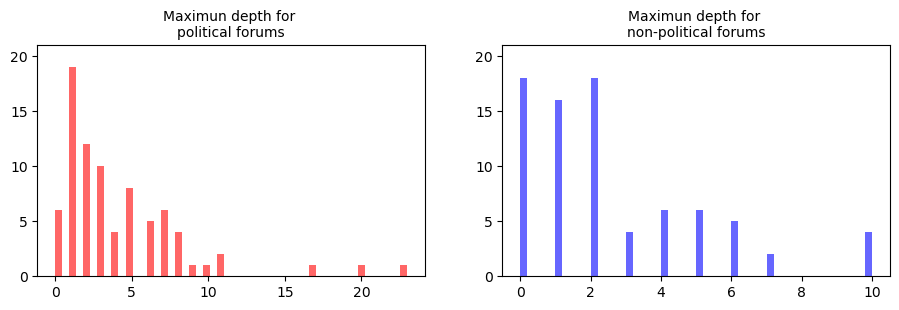

In [101]:
pol_df = subs_info[:81]
nopol_df = subs_info[81:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

ax1.hist(list(pol_df['max_depth']), log=False, bins= 50, color = 'red', alpha = 0.6)
ax1.set_title('Maximun depth for \npolitical forums', fontsize= 10)
ax1.set_ylim(0,21)

ax2.hist(list(nopol_df['max_depth']), log=False, bins= 50, color = 'blue', alpha = 0.6)
ax2.set_title('Maximun depth for \nnon-political forums', fontsize= 10)
ax2.set_ylim(0,21)



[None, None]

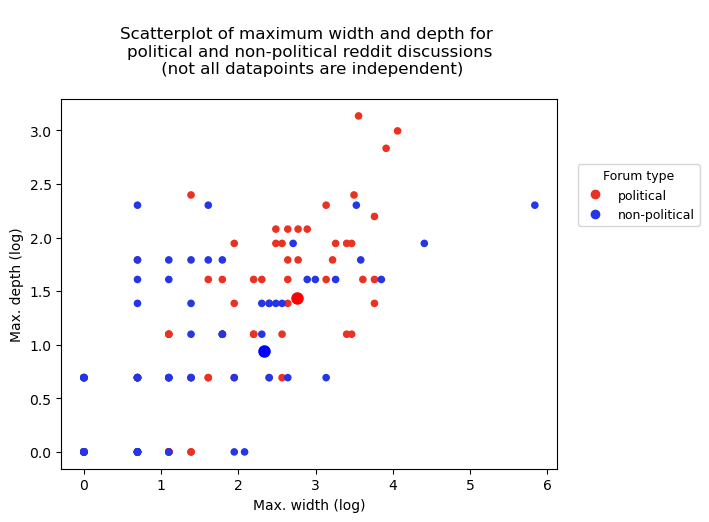

In [102]:
colors = (['#eb3121'] * 80) + (['#2536e6'] * 80)

subs_info.plot.scatter(x='log_width', y='log_depth', c=colors)

plt.plot(np.log(subs_info.loc[:81, 'max_width'].mean()), np.log(subs_info.loc[:81, 'max_depth'].mean()), marker="o", markersize=8, markeredgecolor="red",
markerfacecolor="red")
plt.plot(np.log(subs_info.loc[81:, 'max_width'].mean()), np.log(subs_info.loc[81:, 'max_depth'].mean()), marker="o", markersize=8, markeredgecolor="blue",
markerfacecolor="blue")

plt.xlabel('Max. width (log)')
plt.ylabel('Max. depth (log)')
plt.title('\nScatterplot of maximum width and depth for \npolitical and non-political reddit discussions\n (not all datapoints are independent)\n')

#Legend
#handlelist and parties as marker and label for legend, 
#ncol for horizontal, bigger markerscale, change of proportion for better fitting
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in pd.Series(colors).unique()] #create handle list for each required color
leg1 = plt.legend(handlelist, ['political', 'non-political'], bbox_to_anchor=(1.3, 0.74), loc='center right', \
                  prop={'size': 9}, markerscale = 1, ncol = 1, title = 'Forum type', \
                  title_fontsize=9)
plt.setp(leg1.get_title(), multialignment='center')


[None, None]

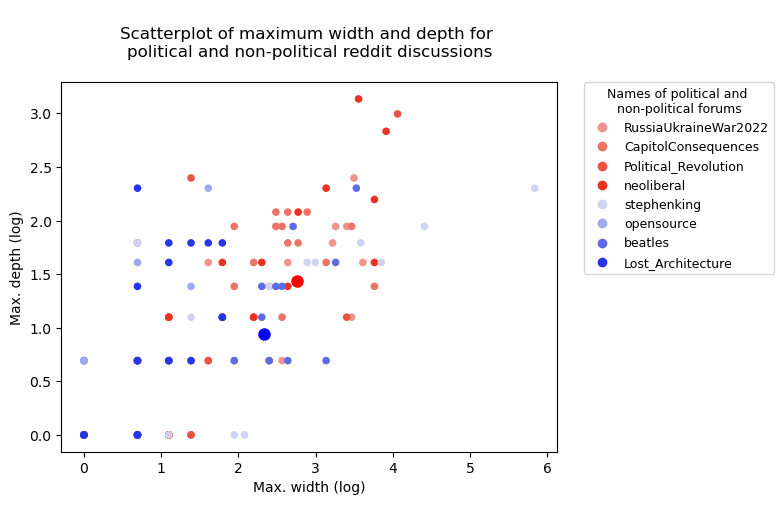

In [103]:
colors = (['#f0948d'] * 20) + (['#ed7268'] * 20) + (['#eb5346'] * 20) + (['#eb3121'] * 20)\
         + (['#d0d3f2'] * 20) + (['#a1a8f0'] * 20) + (['#5e6ae6'] * 20) + (['#2536e6'] * 20)

#Discussions data points
subs_info.plot.scatter(x='log_width', y='log_depth', c=colors)

#Average points
plt.plot(np.log(subs_info.loc[:81, 'max_width'].mean()), np.log(subs_info.loc[:81, 'max_depth'].mean()), marker="o", markersize=8, markeredgecolor="red",
markerfacecolor="red")
plt.plot(np.log(subs_info.loc[81:, 'max_width'].mean()), np.log(subs_info.loc[81:, 'max_depth'].mean()), marker="o", markersize=8, markeredgecolor="blue",
markerfacecolor="blue")

plt.xlabel('Max. width (log)')
plt.ylabel('Max. depth (log)')
plt.title('\nScatterplot of maximum width and depth for \npolitical and non-political reddit discussions\n')

#Legend
#handlelist and parties as marker and label for legend, 
#ncol for horizontal, bigger markerscale, change of proportion for better fitting
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in pd.Series(colors).unique()] #create handle list for each required color
leg1 = plt.legend(handlelist, subs_info['forum_name'].unique(), bbox_to_anchor=(1.45, 0.74), loc='center right', \
                  prop={'size': 9}, markerscale = 1, ncol = 1, title = 'Names of political and \nnon-political forums', \
                  title_fontsize=9)
plt.setp(leg1.get_title(), multialignment='center')


* Interpret your results.
* What are the limitations of this analysis?

Although the graphic representation of the width and depth frequencies and their sacatterplot may look as if political subreddits would have higher values of these two variables -e.g. higher spikes for the lower levels of these values for the non-political histograms-, the statistical tests only showed a significant result for the depth variable. However, it should be noted that the lack of significance for this test is specially driven but two high width values for the stephenking subreddit and not a general tendency.

The power of the analysis may be remarked as a limitation since each group (political or non-political) has only 4 independent measures. In addition, it may also be of use to approach the subjects of the non-political threads more carefully. It may occur that for some restricted areas of interest (like highly read fiction sagas and authors) the discussion dynamics are closer to those in the political field and subreddits on these topics may biased statistical test results.

## Part 1
## Social Network Analysis of Swiss Politicians on Twitter Data
In the first part of this assignment you will do the following tasks:
1. Build social network of retweets
2. Calculate assortativity
3. Permutation tests
4. Community detection

### Install requirements. 

The following cell contains all the necessary dependencies needed for this task. If you run the cell everything will be installed.  

* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.
* [`numpy`](https://numpy.org/) is a Python package for mathematical functions. [Here](https://numpy.org/doc/stable/reference/index.html) is the documentation of `numpy`.
* [`matplotlib`](https://matplotlib.org/) is a Python package for creating plots. [Here](https://matplotlib.org/stable/api/index.html) is the documentation of `matplotlib`.
* [`networkx`](https://networkx.org/) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. [Here](https://networkx.org/documentation/stable/reference/index.html) is the documentation of `networkx`.

### Import requirements
The cell below imports all necessary dependancies. Make sure they are installed (see cell above).

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pickle # for reddit lists of Part 2
import random # for permutation

### Exercise 1: Load social networks of retweets *(1 point)*

The attached `swiss_pol_retweet_network.gexf` file contains an undirected retweet network of Swiss politicians for the time between 2021-07-12 and 2022-07-12. Each node in the network is a represents a politician, and stores their Twitter user id, username, and party affiliation. An edge exists between a pair of politicians that exchanged at least one retweet with each other (regardless of the direction).

* How many nodes and edges are there in the network?
* Visualize the graph. Use [`draw_networkx`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for this.

In [ ]:
swisspol = nx.read_gexf('swiss_pol_retweet_networkgexf.sec')

#Self retweets aren't informative to assess interactions between politicians, therefore I remove them
edges_list = list(swisspol.edges)
self_edge = [edge for edge in edges_list if edge[0] == edge[1]]
swisspol.remove_edges_from(self_edge)

In [ ]:
f'There are {len(swisspol.nodes)} nodes in the network'

'There are 334 nodes in the network'

In [ ]:
#See nodes with data
list(swisspol.nodes(data='party'))[:5]

[('25254764', 'AL'),
 ('472372843', 'AL'),
 ('1948049047', 'AL'),
 ('778497337', 'AL'),
 ('383803341', 'BDP')]

In [ ]:
#Store Twitter user id, username, and party affiliation

#id
ids = nx.get_node_attributes(swisspol, 'label') #dictionary
list_nodes = [i for i in ids]

#username (dictionary for labels)
username_lable = nx.get_node_attributes(swisspol, 'username')

#Party (dictionary)
user_parties = nx.get_node_attributes(swisspol, 'party')

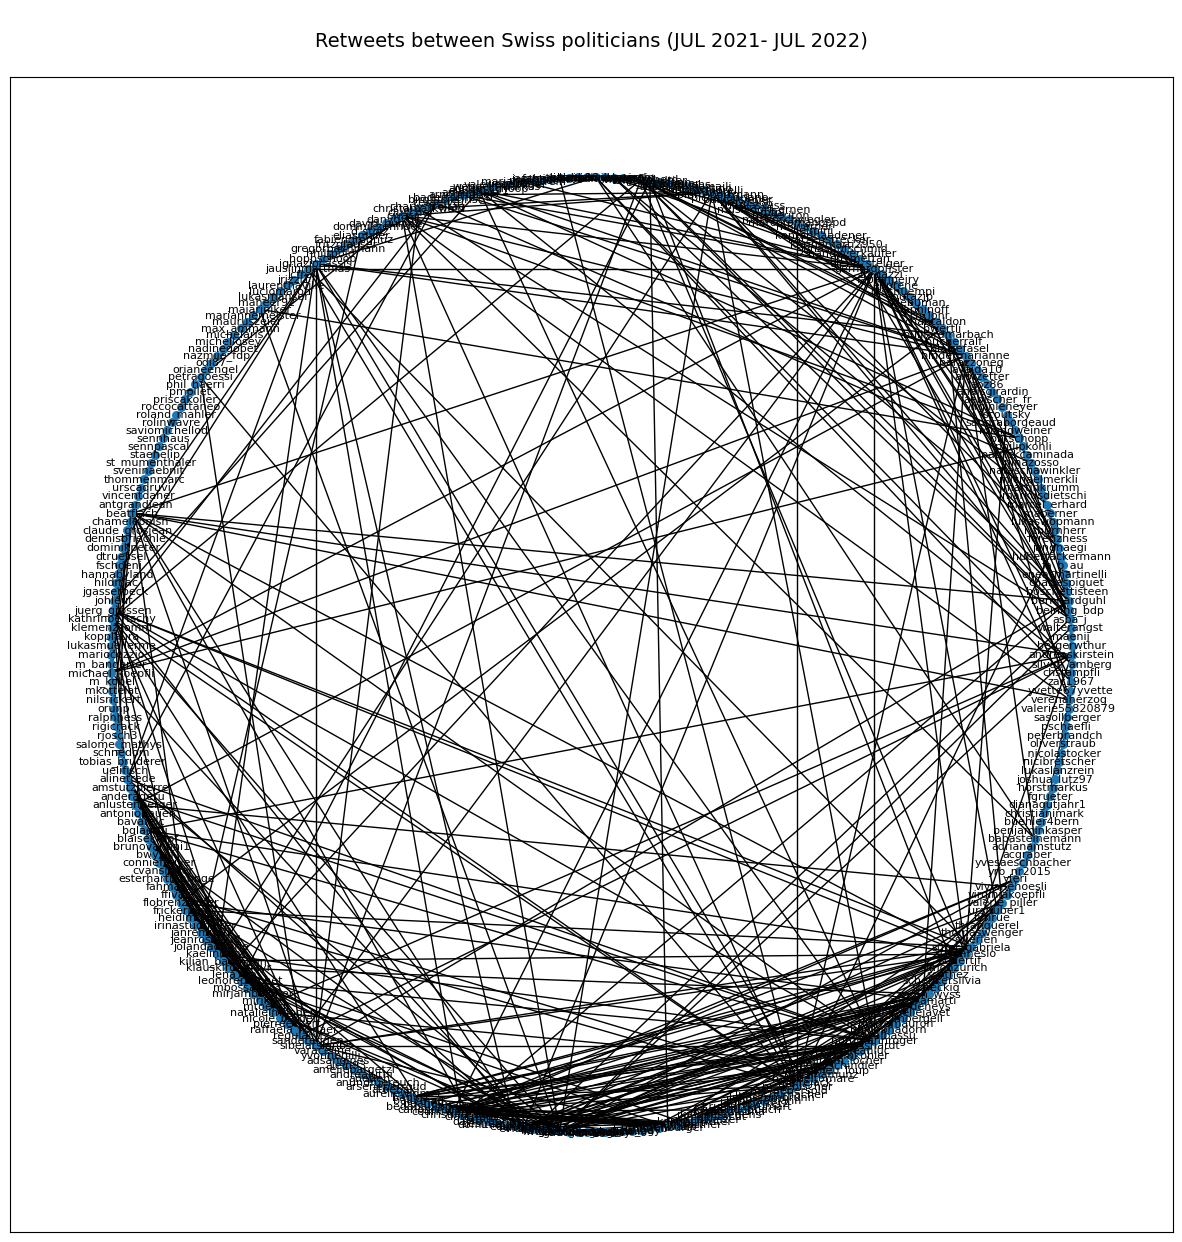

In [ ]:
#Plotting figure with draw_networkx

#Size
plt.figure(figsize=(15, 15))

#Create axis instance
ax = plt.gca() 

#Graph
nx.draw_networkx(swisspol, ax = ax, pos = nx.circular_layout(swisspol),
                 node_size = 30, with_labels = True, labels = username_lable, font_size=8)

#Title
ax.set_title('\nRetweets between Swiss politicians (JUL 2021- JUL 2022)\n', size=14)

plt.show()

### Exercise 2: Calculate graph assortativity *(2 points)*

Use the function [`attribute_assortativity_coefficient`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html) of `networkx` to calculate the assortativity with respect to party labels. How high is the value?

In [ ]:
#Assortativity calculation
swisspol_assort = nx.attribute_assortativity_coefficient(swisspol, 'party')
f'Network assortavity is of {round(swisspol_assort, 4)}'

'Network assortavity is of 0.5197'

To see if the assortativity value fits your expectations, use the function [`draw_networkx`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) to plot the network coloring each node according to the political party label of the politician. Does the pattern of colors fit the value of assortativity?

In [ ]:
#Inspect number of parties
parties_list = []
for k, v in user_parties.items():
    parties_list.append(v)

party_names = list(set(parties_list))
len(set(party_names))
#11

party_names

['UP', 'EVP', 'SVP', 'Green', 'GLP', 'EDU', 'CVP', 'FDP', 'SP', 'BDP', 'AL']

In [ ]:
#Set3 palette has different categorical colors, easy to differentiate, choose 11 of them
Set3 = list(mpl.colormaps['Set3'].colors[:11])

#Change to hex expression
color_listhex = [mpl.colors.rgb2hex(color) for color in Set3]


In [ ]:
#Create a dictionary to assign a color to each party
color_dict = {}
for party, color in zip(party_names, color_listhex):
    color_dict[party] = color
color_dict

{'UP': '#8dd3c7',
 'EVP': '#ffffb3',
 'SVP': '#bebada',
 'Green': '#fb8072',
 'GLP': '#80b1d3',
 'EDU': '#fdb462',
 'CVP': '#b3de69',
 'FDP': '#fccde5',
 'SP': '#d9d9d9',
 'BDP': '#bc80bd',
 'AL': '#ccebc5'}

In [ ]:
#Color list is required by node_color argument
colors_list = [color_dict[party] for party in parties_list]

In [ ]:
#Coloring interparty and inside party edges is also helpful
edges_colors = []
for edge in edges_list:
    if user_parties[edge[0]] == user_parties[edge[1]]:
        edges_colors.append('#d6475f') #444444
    else:
        edges_colors.append('#4750d6') #other tries: c60053 c90076

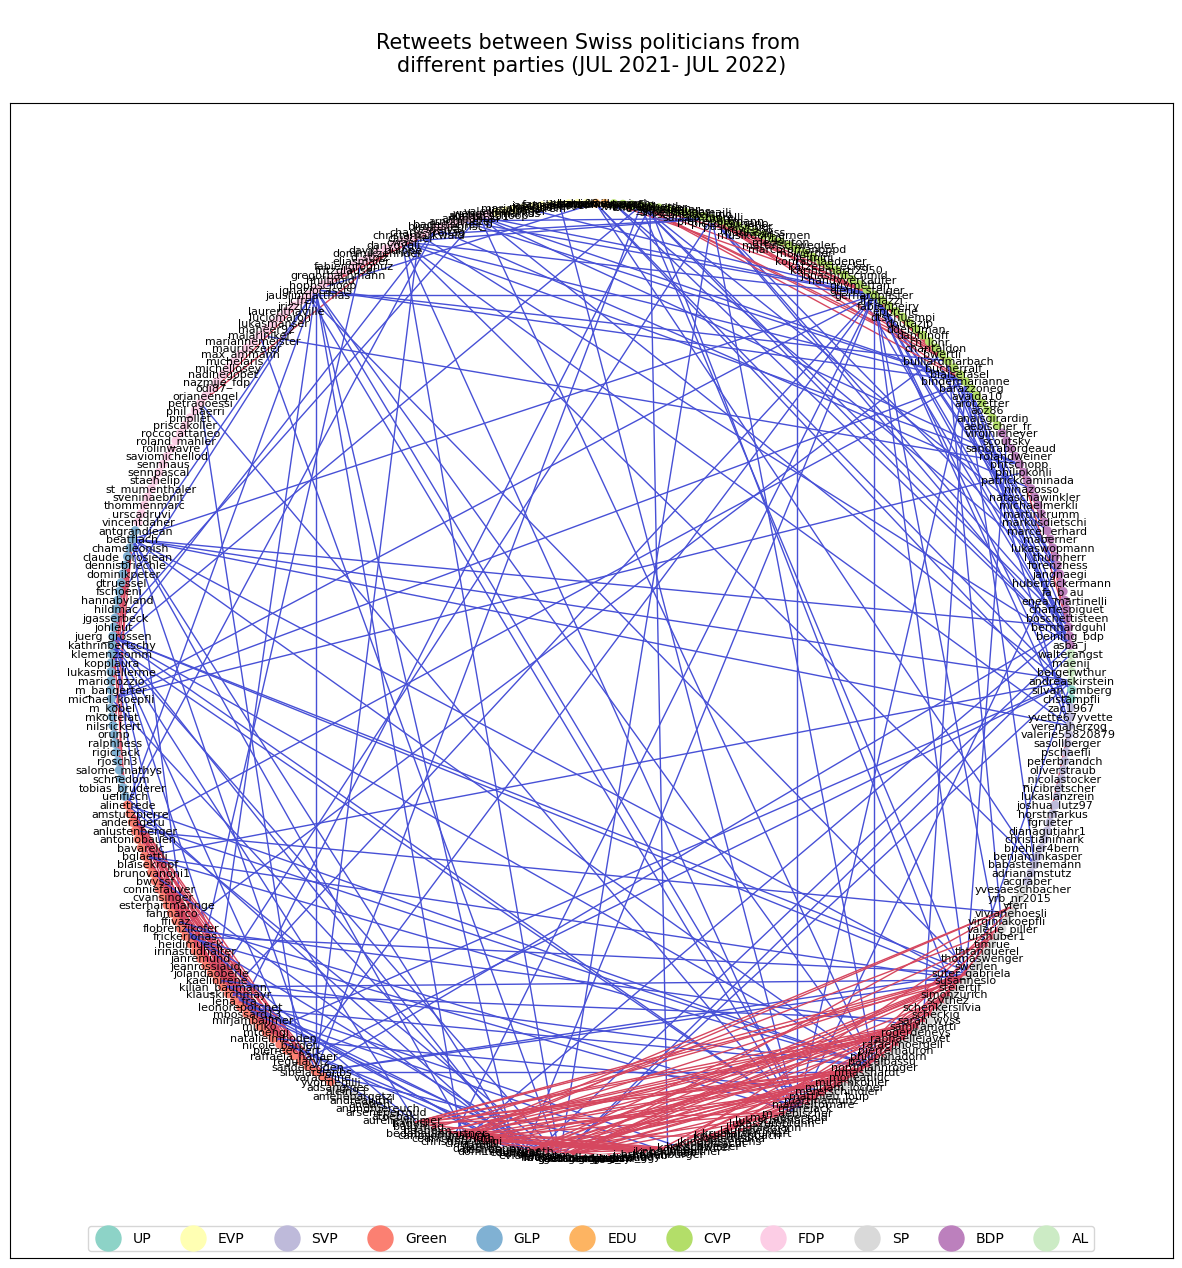

In [ ]:
#Plotting figure

#Size
plt.figure(figsize=(15, 15))

#create axis instance
ax = plt.gca() 


nx.draw_networkx(swisspol, ax = ax, node_color = colors_list, pos = nx.circular_layout(swisspol),
                 node_size = 30, with_labels = True, labels = username_lable, font_size=8,
                 edgelist= edges_list, edge_color= edges_colors)

#Title
ax.set_title('\nRetweets between Swiss politicians from \ndifferent parties (JUL 2021- JUL 2022)\n', size=15)

#Legend
#handlelist and parties as marker and label for legend, 
#ncol for horizontal, bigger markerscale, change of proportion for better fitting
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in color_listhex] #create handle list for each required color                                                                                    #required to insert in legend    
leg1 = plt.legend(handlelist, party_names, loc='lower center', prop={'size': 10}, markerscale = 3, ncol = 11)

plt.show()

In [ ]:
#Second try for different layout 

#Use colors info to move node to a particular sector
dict_colors = {node:color for node, color in zip(list_nodes, colors_list)}

In [ ]:
# prep center points (along circle perimeter) for the clusters
pos = nx.circular_layout(swisspol)
angs = np.linspace(0, 1.5, 1+len(color_listhex))
repos = []
rad = 1.7     # radius of circle
for ea in angs:
    if ea > 0:
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in dict_colors.keys():
    if dict_colors[ea] == '#8dd3c7':
        #color = 'green' #GLP
        posx = 0
    elif dict_colors[ea] == '#ffffb3':
        #color = 'royalblue' #UP
        posx = 1
    elif dict_colors[ea] == '#bebada':
        #color = 'red' #CVP
        posx = 2
    elif dict_colors[ea] == '#fb8072':
        #color = 'orange' #AL
        posx = 3
    elif dict_colors[ea] == '#80b1d3':
        #color = 'cyan' #EDU
        posx = 4
    elif dict_colors[ea] == '#fdb462':
        #color = 'cyan' #FDP
        posx = 10
    elif dict_colors[ea] == '#b3de69':
        #color = 'cyan' #BDP
        posx = 6
    elif dict_colors[ea] == '#fccde5':
        #color = 'cyan' #SVP
        posx = 7
    elif dict_colors[ea] == '#ccebc5':
        #color = 'cyan' #Green
        posx = 8
    elif dict_colors[ea] == '#d9d9d9':
        #color = 'cyan' #EVP
        posx = 9
    elif dict_colors[ea] == '#bc80bd':
        #color = 'cyan' #SP
        posx = 5
    else:
        pass
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] = repos[posx] + np.array([random.uniform(0,0.5), random.uniform(0,0.5)]) #random.uniform(0, 2)

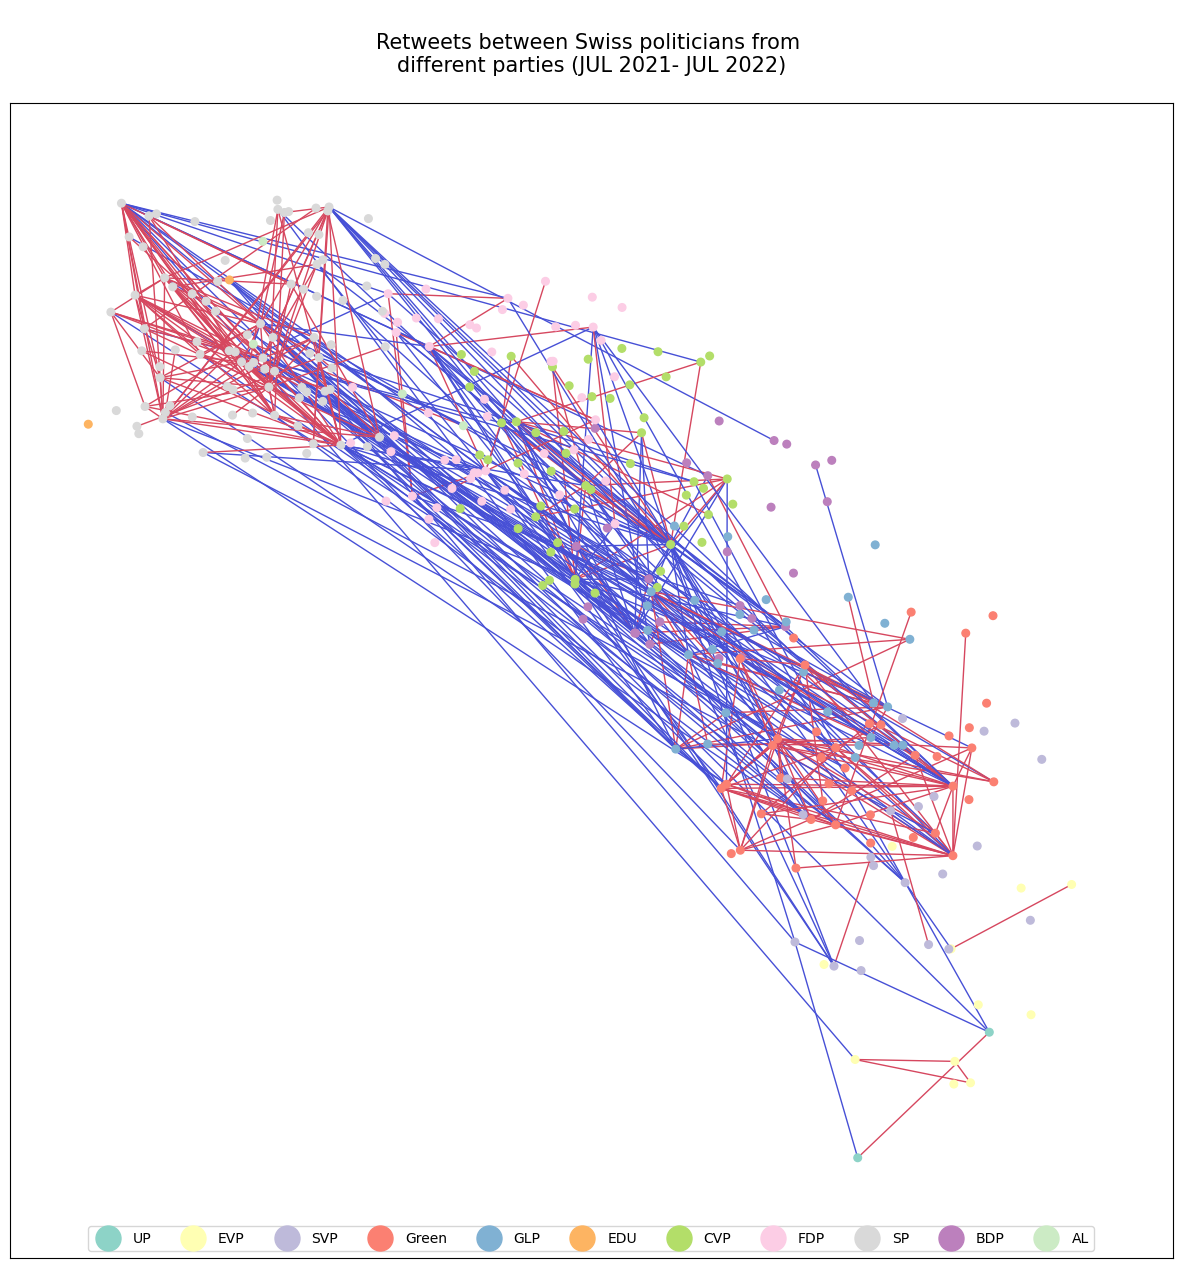

In [ ]:
#Plotting figure

#Size
plt.figure(figsize=(15, 15))

#create axis instance
ax = plt.gca() 


nx.draw_networkx(swisspol, ax = ax, node_color = colors_list, pos = pos,
                 node_size = 30, with_labels = False, labels = username_lable, font_size=10,
                 edgelist= edges_list, edge_color= edges_colors)

#Title
ax.set_title('\nRetweets between Swiss politicians from \ndifferent parties (JUL 2021- JUL 2022)\n', size=15)

#Legend
#handlelist and parties as marker and label for legend, 
#ncol for horizontal, bigger markerscale, change of proportion for better fitting
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in color_listhex] #create handle list for each required color                                                                                    #required to insert in legend    
leg1 = plt.legend(handlelist, party_names, loc='lower center', prop={'size': 10}, markerscale = 3, ncol = 11)

plt.show()

I would have thought that assortavity would be even closer to cero. I believe the final result is very much driven by SP and Green (and maybe GLP) parties high ingroup interconexions (dense red areas). It may be the case that the mechanisms that generate assortativity -like homophily- are stronger in these groups.

### Exercise 3: Permutation tests *(2 points)*

Next, we are going to use a permutation test to test whether the above result could have happened at random. 

First, let's run a permutation. Perform the same assortativity calculation as above but permuting the party labels of nodes. 

Also set the party for each node as node attribute by using [`set_node_attribute`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html) (be carefull the parties are now permuted).

In [ ]:
#Import true values
swisspol2 = nx.read_gexf('swiss_pol_retweet_networkgexf.sec')

# Get the list of nodes in the graph
nodes = list(swisspol2.nodes())

# Get the list of parties in the graph
parties = [user for user in user_parties.values()]

# Permute the party list randomly
random.shuffle(parties)

# Consolidate new party order with nodes
permuted_labels = {node: party for node, party in zip(nodes, parties)}

nx.set_node_attributes(swisspol2, permuted_labels, 'party')

swisspol_assort2 = nx.attribute_assortativity_coefficient(swisspol2, 'party')
f'Network assortavity is of {round(swisspol_assort2, 4)}'


'Network assortavity is of -0.0177'

Is the value much closer to zero?
Repeat the calculation with 1000 permutations and plot the histogram of the resulting values. Add a line with the value of the assortativity without permutation. Is it far or close to the permuted values?

In [ ]:
#The output value was much closer to zero
def permuting(graph, group_category, permutations = 1000):  
    
    assort_true = nx.attribute_assortativity_coefficient(graph, group_category)
    graph2 = graph.copy()

    # Get the list of nodes in the graph
    nodes = list(graph.nodes())

    # Get the list of category of interest (here parties) in the graph
    user_cat = nx.get_node_attributes(graph, group_category)
    categories = [category for category in user_cat.values()]

    assort_values = []
    for i in range(permutations):
        # Permute the party list randomly
        random.shuffle(categories)
        
        # Consolidate new party order with nodes
        permuted_labels = {node: cat for node, cat in zip(nodes, categories)}

        nx.set_node_attributes(graph2, permuted_labels, group_category)

        assort_values.append(nx.attribute_assortativity_coefficient(graph2, group_category))

    fig, ax = plt.subplots(figsize=(7, 5))

    #Assortativity values histogram with random permutation and line with true value 
    plt.hist(assort_values, log=False, bins= 50, color = 'blue', alpha = 0.4)
    plt.axvline(x= assort_true, color = 'blue')

    ax.set_title("Random assortativity histogram for \nSwiss politicians network and true value")
    ax.set_xlabel('coeficients')
    ax.set_ylabel('count')

    plt.show()
    
    return assort_values, assort_true

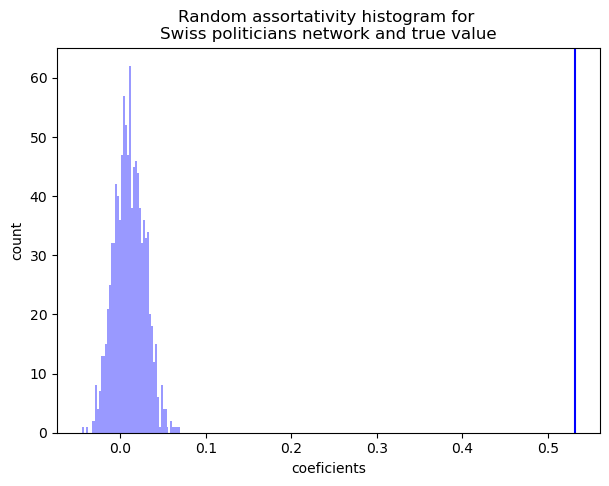

In [ ]:
#Import true values
swisspol2 = nx.read_gexf('swiss_pol_retweet_networkgexf.sec')

random_assorts, assort_true = permuting(swisspol2, 'party')

The line that indicates the true assortativity value looks very far from the random permutations histogram

To be sure, let's calculate a p-value for the null hypothesis that the assortativity is zero and the alternative hypothesis that it is positive (what we expected):

In [ ]:
# Ho : assortativity = 0
# H1 : assortativity > 0

assortativity_array = np.array(random_assorts)

# Count the number of values greater than or equal to the observed assortativity
# plus one added because p-value cant be 0, it can only be very unlikely

observed_assortativity = assort_true  # The observed assortativity value

p_value = (np.sum(assortativity_array >= observed_assortativity)+1) / len(assortativity_array)
          #times the real value or a greater one occurred in our permutations, 
          #divided by total number of permutations

print((f'The p-value is {p_value}'))

The p-value is 0.001


After looking at the above results, do you think it is likely that the assortativity we found in the data was produced by chance?

Since the p-value obtained is very low, the possibility of our data ocurring by chance in a world where the null hypothesis is true is also very low. There is evidence to refute the null hypothesis hypothesis.

### Exercise 4: Community detection *(3 points)*

Let's test if Twitter communities match political affiliations. Remove nodes with degree zero in the network and run the [Louvain community detection algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html). Visualize the result coloring nodes by community labels.

In [ ]:
swisspol3 = swisspol.copy()
remove = [node for node, degree in dict(swisspol.degree()).items() if degree < 1]
swisspol3.remove_nodes_from(remove)

In [ ]:
len(remove)

198

In [ ]:
louvain_groups = nx.community.louvain_communities(swisspol3)
#other parameters: weight='weight', resolution=1, threshold=1e-07, seed=None

In [ ]:
len(louvain_groups)

9

In [ ]:
nodes_louv = list(swisspol3.nodes())

group_list = []

#For each user/politician...
for user in nodes_louv:
    #Check in which of the lovain_groups they are
    for i, group in enumerate(louvain_groups):
        if user in group:
            group_list.append(i)
            break #as each usear is in one group, one it is found the grouploop can be broken

In [ ]:
group_list[:5]

[4, 4, 0, 0, 0]

In [ ]:
#Set3 palette has different categorical colors, easy to differentiate, choose 11 of them
Set32 = list(mpl.colormaps['Set3'].colors[:9])

#Change to hex expression
color_listhex2 = [mpl.colors.rgb2hex(color) for color in Set32]

In [ ]:
#Create a dictionary to assign a color to each party
color_dict2 = {}
for group, color in zip(range(9), color_listhex2):
    color_dict2[group] = color
color_dict2

{0: '#8dd3c7',
 1: '#ffffb3',
 2: '#bebada',
 3: '#fb8072',
 4: '#80b1d3',
 5: '#fdb462',
 6: '#b3de69',
 7: '#fccde5',
 8: '#d9d9d9'}

In [ ]:
colors_list2 = [color_dict2[group] for group in group_list]

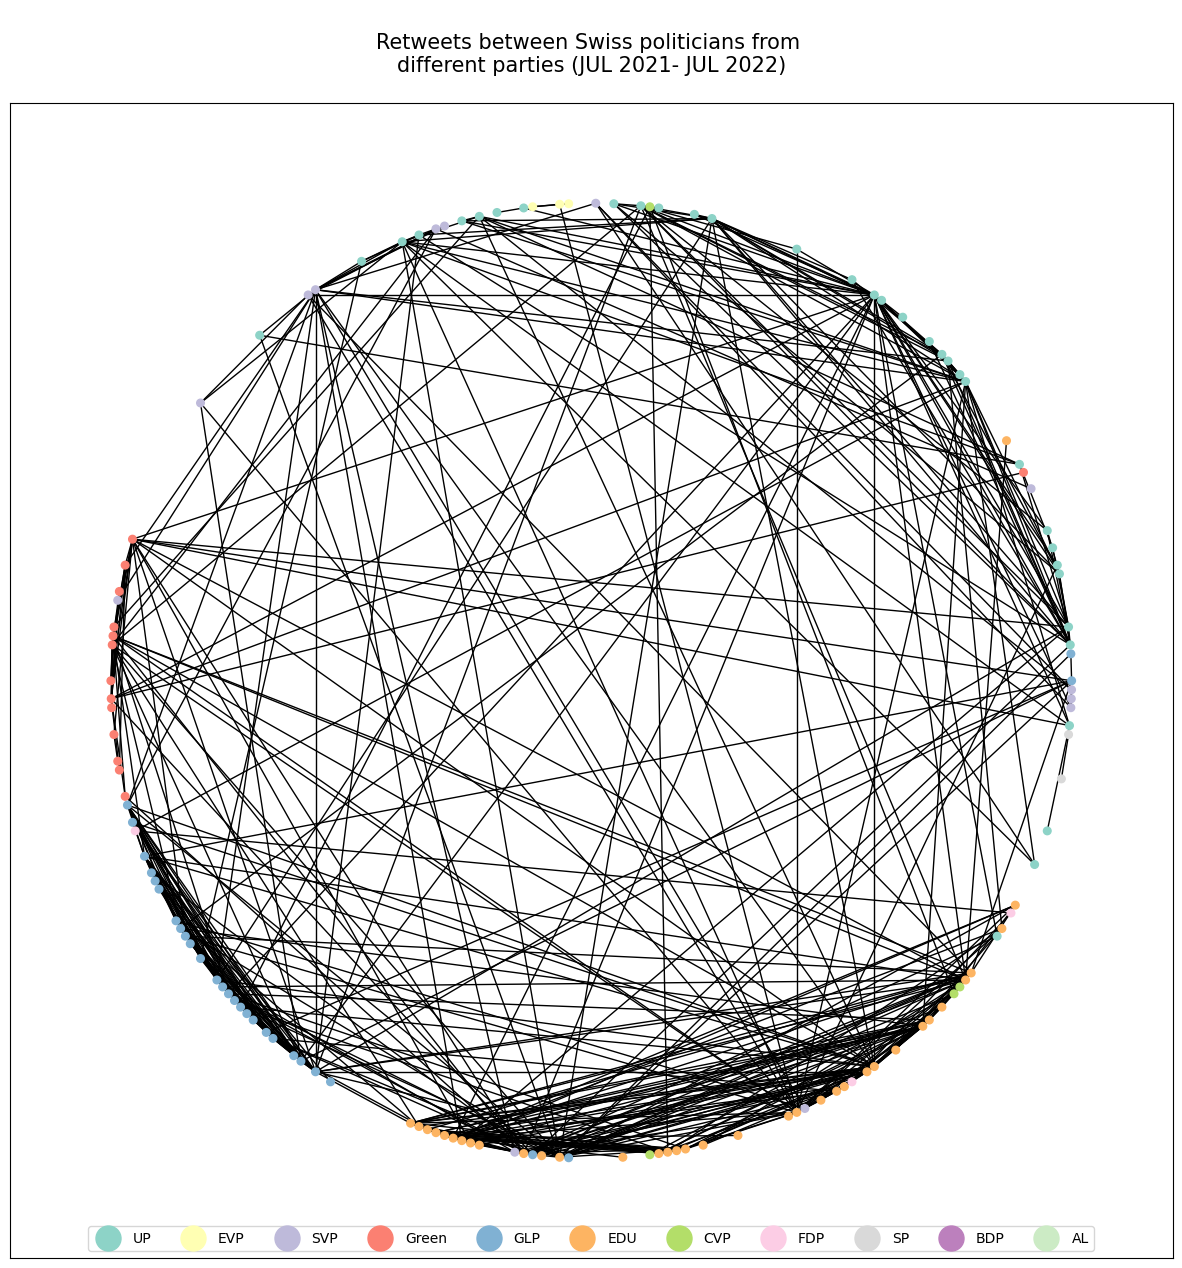

In [ ]:
#Plotting figure

#Size
plt.figure(figsize=(15, 15))

#create axis instance
ax = plt.gca() 


nx.draw_networkx(swisspol3, ax = ax, node_color = colors_list2, pos = nx.circular_layout(swisspol),
                 node_size = 30, with_labels = False, labels = username_lable, font_size=10)
                 #edgelist= edges_list, edge_color= edges_colors)

#Title
ax.set_title('\nRetweets between Swiss politicians from \ndifferent parties (JUL 2021- JUL 2022)\n', size=15)

#Legend
#handlelist and parties as marker and label for legend, 
#ncol for horizontal, bigger markerscale, change of proportion for better fitting
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in color_listhex] #create handle list for each required color                                                                                    #required to insert in legend    
leg1 = plt.legend(handlelist, party_names, loc='lower center', prop={'size': 10}, markerscale = 3, ncol = 11)

plt.show()

Run the [`modularity`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html) function with the above community labels. Is it high enough to think that the network has a community structure?

In [ ]:
nx.community.modularity(swisspol3, louvain_groups)

0.4901795679209183

Since modularities closer to 1 reflect community structure, the obtained value seems high enough to talk about community structure in the analyzed context.

Repeat but using the party labels instead of the communities detected with Louvain. Is it higher or lower? How far is this modularity from the maximal one found with Louvain?

For this iterate over the parties and filter a subset of users that is in the given party and in the graph. Add the ids of these partymembers (do not include any duplicates) and repeat this for all parties.

Afterwards you can calculate the modularity.

In [ ]:
#Since the original labels of the network are the parties, the above can be done with label_propagation_communities
nx.community.modularity(swisspol3, nx.community.label_propagation_communities(swisspol3))

0.44842653858418363

The modularity obtained is lower but not very far from the one resulting of the Louvain groups. 

Finally, to understand which parties are represented in each community, build a data frame for nodes with two columns: one with the party label and another one with the community label. Use the [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to print a contingency table. Which party or parties compose each community?

In [ ]:
dict_parties = dict(swisspol3.nodes(data='party'))

dict_lovain = {}
for i, group in enumerate(louvain_groups):
    for user in group:
        dict_lovain[user] = i
dict_lovain

# Create lists to store the values from each dictionary
values1 = []
values2 = []

# Iterate over the common keys and retrieve the values from each dictionary
for key in dict_lovain.keys():
    values1.append(dict_lovain[key])
    values2.append(dict_parties[key])

In [ ]:
df = pd.DataFrame({'user': list(dict_lovain.keys()), 'party': values2, 'grouping': values1})

In [ ]:
#Use of groupby()

contingency_table = df.groupby(['party', 'grouping']).size().unstack(fill_value=0)
print(contingency_table)

#Party GLP is motly in community 3
#Parties BDP, FDP and CVP are mostly in community 0
#Party EVP is divided between community 0 and 1
#Party Green is mostly in community 4
#Paty SP is mostly in community 5

#Communities 2, 6, 7 and 8 don't have a the majority of any party


grouping   0  1  2   3   4   5  6  7  8
party                                  
AL         0  0  0   0   2   0  0  0  0
BDP        7  0  1   1   0   1  0  0  0
CVP       15  0  0   0   0   0  1  0  0
EDU        0  0  1   0   0   0  0  0  0
EVP        2  3  0   0   0   0  0  0  0
FDP        6  0  5   0   0   0  0  0  0
GLP        0  0  1  13   0   0  0  0  0
Green      0  0  0   0  24   0  0  1  0
SP         1  0  2   0   2  34  3  2  0
SVP        3  0  1   0   0   0  0  0  2
UP         0  0  2   0   0   0  0  0  0


In [ ]:
#Use of crosstab

pd.crosstab(index=df['party'], columns=df['grouping'])


grouping   0  1  2   3   4   5  6  7  8
party                                  
AL         0  0  0   0   2   0  0  0  0
BDP        7  0  1   1   0   1  0  0  0
CVP       15  0  0   0   0   0  1  0  0
EDU        0  0  1   0   0   0  0  0  0
EVP        2  3  0   0   0   0  0  0  0
FDP        6  0  5   0   0   0  0  0  0
GLP        0  0  1  13   0   0  0  0  0
Green      0  0  0   0  24   0  0  1  0
SP         1  0  2   0   2  34  3  2  0
SVP        3  0  1   0   0   0  0  0  2
UP         0  0  2   0   0   0  0  0  0

### Exercise 5: Prediction and discussion of other methods *(3 points)*
* How well can you predict the party of a politician from its neighbors in the network? Here you can use the rule of predicting the party as the majority party among its neighbors and evaluate the accuracy of this approach.

In [ ]:
# Predict party by majority neighbors (since at least degree 1 is requiered swisspol3 is used)
def predict_party(node):
    neighbors = swisspol3.neighbors(node)
    
    party_counts = {}
    for neighbor in neighbors:
        party = swisspol3.nodes[neighbor]['party']
        party_counts[party] = party_counts.get(party, 0) + 1 #starting from 0 counts if none

    return max(party_counts, key=party_counts.get) #return party with max value in party_counts

In [ ]:
neigh_prediction = {}
for i in swisspol3.nodes():
    neigh_prediction[i] = predict_party(i)

In [ ]:
pred_part_lov = []

# Iterate over the common keys and retrieve the values from each dictionary
for key in dict_lovain.keys():
    pred_part_lov.append(neigh_prediction[key])

df['neig_predicted'] = pred_part_lov

In [ ]:
total_pred = len(df)
correct_pred = sum(df['party'] == df['neig_predicted'])
accuracy = correct_pred / total_pred
print(f'Accuracy of neighbors method: {round(accuracy*100,2)}%')

Accuracy of neighbors method: 80.15%


* What would be the results if we use the network of replies? Do you expect assortativity and modularity to be higher or lower?
* If you retrieved data of follower links, you can repeat the above analysis for directed following relationships. Do you expect a higher or lower assortativity?

- Having into account that replies are more probably engaged with discussing with divergent views, the assortavity would be lower<br>
- As following is a more passive action and does not imply having according views with the followee lower assortativity could be expected. Moreover, having a diverse diet of followed politicians, may show tolerance to discence, which can be taken as a good quality for politicians. However, in the world of politics, politicians may also be advised to only follow those from their own party to avoid "giving popularity" to politicians of other political spaces. More knowledge on the swiss politics should be therefore necessary to answer this question.